In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QUIMIO_MAIS60_FILTRADO.csv to QUIMIO_MAIS60_FILTRADO.csv


# Leitura dos arquivos de dados

Esse dataset ja foi aplicado o filtro de sexo, selecionando apenas o sexo femininio e tambem o filtro na coluna AP_PRIPAL e apenas registros com idade maior que 60 anos, pegando apenas os procedimentos que são aplicados ao nosso problema.


In [ ]:
#IREMOS UTILIZAR O ARQUIVO FILTRADO
df_Original = pd.read_csv('QUIMIO_MAIS60_FILTRADO.csv')
df_Original.shape
#(1790600, 12)

(1790600, 12)

In [ ]:
df_Original.QTD.sum()
#3618640

3618640

Listando os 5 primeiros registros do dataset

In [ ]:
df_Original.head()
df_2 = df_Original.copy()
df_2 =df_2.rename({'Unnamed: 0':'Idx'}, axis='columns')
df_2.head()


Idx  AP_NUIDADE  AP_TPAPAC AP_CIDPRI  ...     DTSOLIC METASTATICO   ANO  QTD
0    0          60          1      C500  ...  30/04/2018         0.0  2018    1
1    1          60          1      C500  ...  31/07/2018         0.0  2018    1
2    2          60          1      C500  ...  31/05/2018         1.0  2018    1
3    3          60          1      C500  ...  31/03/2019         0.0  2019    1
4    4          60          1      C500  ...  31/12/2018         0.0  2018    1

[5 rows x 12 columns]

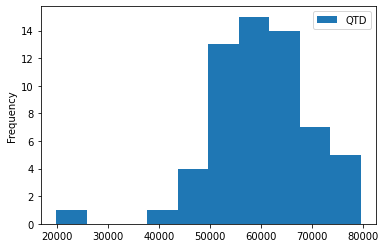

In [ ]:
#Histograma dos dados agrupados por mes/ano
df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD'].sum().plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


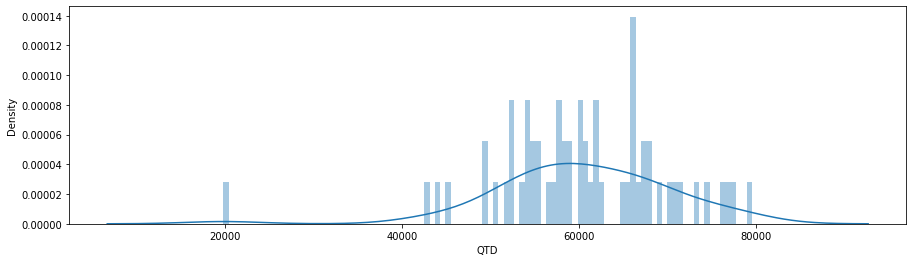

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))
sns.distplot(df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD'].sum()['QTD'], bins=100, ax=ax1)

In [ ]:
# média
#Histograma dos dados agrupados por mes/ano
(df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD']).sum().mean()


QTD    60310.666667
dtype: float64

A média de 60310.66 atendimentos por mês

In [ ]:
print('Média: ', (df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD']).sum()['QTD'].mean())
print('Min: ', (df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD']).sum()['QTD'].min())
print('Max: ', (df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD']).sum()['QTD'].max())


Média:  60310.666666666664
Min:  19784
Max:  79581


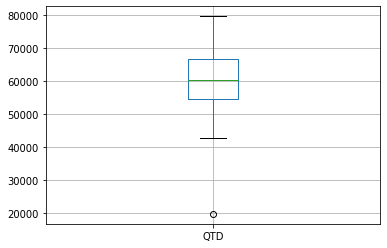

In [ ]:

(df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD'].sum()).boxplot(column=['QTD'])

Esta é uma função que facilita a visualização dos dados. Essa função vai receber o dataframe como parametro e vai listar o nome da coluna, o tipo dos seues dados, o nº de dados unicos, a quantidade de registros, e a quantidade de dados missing, e o % de missing.

In [ ]:
def infoDf(df):
    info_df = pd.DataFrame({ 'Columns': df.columns,
                        'Type': df.dtypes,
                        'Unique': df.nunique(),                        
                        'Size': df.shape[0],
                        'Missing': df.isna().sum()    
    })
    info_df['% Unique'] = round(info_df['Unique']/info_df['Size'] ,3)
    info_df['% Missing'] = round(info_df['Missing']/info_df['Size'] ,3)
    return info_df

In [ ]:
#missing data
def missingData(df, num=20):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(num)

In [ ]:
# Execução da função passando o dataframe com parametro
infoDf(df_2)

Columns     Type   Unique  ...  Missing  % Unique  % Missing
Idx                  Idx    int64  1790600  ...        0     1.000      0.000
AP_NUIDADE    AP_NUIDADE    int64       40  ...        0     0.000      0.000
AP_TPAPAC      AP_TPAPAC    int64        2  ...        0     0.000      0.000
AP_CIDPRI      AP_CIDPRI   object        9  ...        0     0.000      0.000
AQ_ESTADI      AQ_ESTADI  float64        5  ...        0     0.000      0.000
AQ_ESQU_P2    AQ_ESQU_P2   object    12776  ...   364842     0.007      0.204
ESTADO_UF      ESTADO_UF   object       27  ...        0     0.000      0.000
MAIOR_60        MAIOR_60    int64        1  ...        0     0.000      0.000
DTSOLIC          DTSOLIC   object       60  ...        0     0.000      0.000
METASTATICO  METASTATICO  float64        2  ...        0     0.000      0.000
ANO                  ANO    int64        5  ...        0     0.000      0.000
QTD                  QTD    int64       60  ...        0     0.000      0.000

[12 rows x 7 columns]

In [ ]:
missingData(df_2, num=4)

Total   Percent
AQ_ESQU_P2   364842  0.203754
QTD               0  0.000000
ANO               0  0.000000
METASTATICO       0  0.000000

In [ ]:
df_2.describe()

Idx    AP_NUIDADE  ...           ANO           QTD
count  1.790600e+06  1.790600e+06  ...  1.790600e+06  1.790600e+06
mean   8.952995e+05  7.063875e+01  ...  2.018107e+03  2.020909e+00
std    5.169018e+05  8.003976e+00  ...  1.409551e+00  1.899807e+00
min    0.000000e+00  6.000000e+01  ...  2.016000e+03  1.000000e+00
25%    4.476498e+05  6.400000e+01  ...  2.017000e+03  1.000000e+00
50%    8.952995e+05  6.900000e+01  ...  2.018000e+03  2.000000e+00
75%    1.342949e+06  7.600000e+01  ...  2.019000e+03  2.000000e+00
max    1.790599e+06  9.900000e+01  ...  2.020000e+03  6.700000e+01

[8 rows x 8 columns]

A código acima mostrar algumas informaçõese estatisticas do dataset, conseguimos visualizar as informações de quantidade de registros (count), média (mean), devio padrão (std), valor minimo e valor maxima (min e max), valor inicial do segundo quadrante (25%), valor inicial do terceiro quadrante (50%), valor inicio do quarto quadrante (75%).
Esse valores de quadrante são melhor visualizados e entendidos utilizando o boxplot.

# Construindo a tabela de frequencia

In [ ]:
# inicialmente vamos testar criando 5 classes de dados e vamos ver se nos atende.
k = 4
idade_inferior = df_2.AP_NUIDADE.min()
idade_superior = df_2.AP_NUIDADE.max()
amplitude = idade_superior - idade_inferior
largura = round(amplitude / k)
print(idade_inferior, idade_superior , largura)

60 99 10


In [ ]:
idades_freq = pd.DataFrame([
  ["60 - 70", df_2.QTD[(df_2.AP_NUIDADE < 70)].sum()],
  ["70 - 80", df_2.QTD[((df_2.AP_NUIDADE >= 70) & (df_2.AP_NUIDADE < 80))].sum()],
  ["80 - 90", df_2.QTD[((df_2.AP_NUIDADE >= 80) & (df_2.AP_NUIDADE < 90))].sum()],
  ["90 - 100", df_2.QTD[((df_2.AP_NUIDADE >= 90))].sum()]
  
], columns=['Idade','Qtd'])

idades_freq['%freq'] = (idades_freq['Qtd'] / idades_freq['Qtd'].sum())*100
idades_freq

Idade      Qtd      %freq
0   60 - 70  2016472  55.724582
1   70 - 80  1146504  31.683284
2   80 - 90   401474  11.094610
3  90 - 100    54190   1.497524

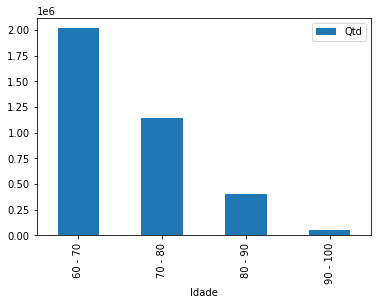

In [ ]:
idades_freq.plot(x='Idade', y='Qtd',kind='bar')

# Quantidade de Registro por Estado

In [ ]:
df_2.groupby('ESTADO_UF')['QTD'].sum().sort_values(ascending=False)

ESTADO_UF
SP    977937
MG    441108
RS    418355
RJ    298919
PR    259160
PE    163090
BA    160574
SC    158344
CE    152390
ES     79667
RN     62487
PB     61828
GO     58191
PI     43821
MA     43428
AL     41114
MS     33371
PA     32942
DF     32519
MT     31628
AM     22636
RO     17863
SE     14809
TO      7470
AC      3351
RR       913
AP       725
Name: QTD, dtype: int64

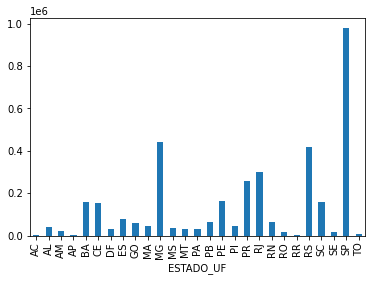

In [ ]:
df_2.groupby('ESTADO_UF')['QTD'].sum().plot.bar()

# Datas

Precisamos olhar como esta distribuido nossos dados em relação aos meses e anos, mas antes disso precisamos ver como os dados de datas estão. Vamos analisar esses dados agora

In [ ]:
# Apenas para visualização, aqui temos todos os anos existentes.
df_2['ANO'].unique()

array([2018, 2019, 2016, 2017, 2020])

In [ ]:
df_2.groupby(['ANO'])['QTD'].sum().sort_values(ascending=False)

ANO
2019    790968
2020    779058
2018    754606
2016    656882
2017    637126
Name: QTD, dtype: int64

In [ ]:
print('Média de Todos os anos:', df_2.groupby('ANO')['QTD'].sum().mean())

Média de Todos os anos: 723728.0


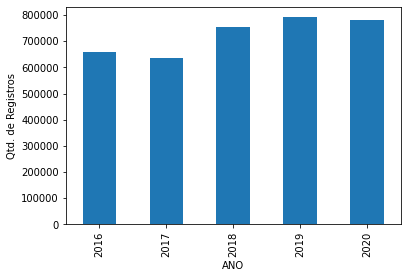

In [ ]:
# Gráfico de Barra com o numero de registro por ANO.
df_2.groupby('ANO')['QTD'].sum().plot.bar(ylabel='Qtd. de Registros')

In [ ]:
# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
df_variacao = pd.DataFrame([
  ["2016", df_2.QTD[(df_2.ANO == 2016)].sum(),  0.0 ],
  ["2017", df_2.QTD[(df_2.ANO == 2017)].sum(), (df_2.QTD[(df_2.ANO == 2017)].sum()/(df_2.QTD[(df_2.ANO == 2016)].sum()))*100-100],
  ["2018", df_2.QTD[(df_2.ANO == 2018)].sum(), (df_2.QTD[(df_2.ANO == 2018)].sum()/(df_2.QTD[(df_2.ANO == 2017)].sum()))*100-100],
  ["2019", df_2.QTD[(df_2.ANO == 2019)].sum(), (df_2.QTD[(df_2.ANO == 2019)].sum()/(df_2.QTD[(df_2.ANO == 2018)].sum()))*100-100],
  ["2020", df_2.QTD[(df_2.ANO == 2020)].sum(), (df_2.QTD[(df_2.ANO == 2020)].sum()/(df_2.QTD[(df_2.ANO == 2019)].sum()))*100-100],
  
], columns=['Ano','Qtd', 'Variacao'])
df_variacao.head()

Ano     Qtd   Variacao
0  2016  656882   0.000000
1  2017  637126  -3.007542
2  2018  754606  18.439053
3  2019  790968   4.818674
4  2020  779058  -1.505750

2016 | Var.:  0.0
2017 | Var.:  -3.0075416893749605
2018 | Var.:  18.43905287180243
2019 | Var.:  4.818673585950805
2020 | Var.:  -1.5057499165579458


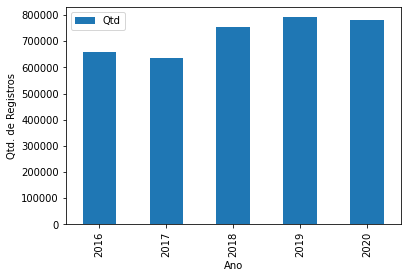

In [ ]:
# Quantidade de Registros por Ano
for ano in df_variacao.Ano.unique():
  print(ano +  ' | Var.: ',df_variacao.Variacao[(df_variacao['Ano']==ano) ].values[0] )
df_variacao.plot(x='Ano', y='Qtd', kind='bar', ylabel='Qtd. de Registros')


# AP_TPAPAC - Indica se a APAC é 1 – inicial, 2 – continuidade, 3 – única

Vamos dar uma olhada nessa variavel em relação aos maiores e menores que 60

In [ ]:
df_2.AP_TPAPAC.unique()

array([1, 2])

In [ ]:
df_2.groupby('AP_TPAPAC')['QTD'].sum()

AP_TPAPAC
1    1272382
2    2346258
Name: QTD, dtype: int64

In [ ]:
anos = df_2.ANO.sort_values().unique()
ap_tpapac = df_2.AP_TPAPAC.unique()
v_dados = []
for ano in anos:

  for tpapac in ap_tpapac:
    qtd_atual = df_2.QTD[(df_2.ANO == ano ) & (df_2.AP_TPAPAC == tpapac)].sum()
    qtd_ant = df_2.QTD[(df_2.ANO == int(ano)-1 ) & (df_2.AP_TPAPAC == tpapac)].sum()
    linha = [ano, tpapac, qtd_atual, 0 if ano==2016 else ((qtd_atual / qtd_ant)*100)-100  ]
    v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfTPAPAC = pd.DataFrame(v_dados, columns=['ANO','AP_TPAPAC','QTD', 'VARIACAO'])


AP_TPAPAC = 1

TPAPAC= 1
2016 | Var.: 0.0
2017 | Var.: -3.1476848533879718
2018 | Var.: 18.848455133967065
2019 | Var.: 4.708610106303752
2020 | Var.: 5.334082386073447
Valor da Qtd. Média:  254476.4


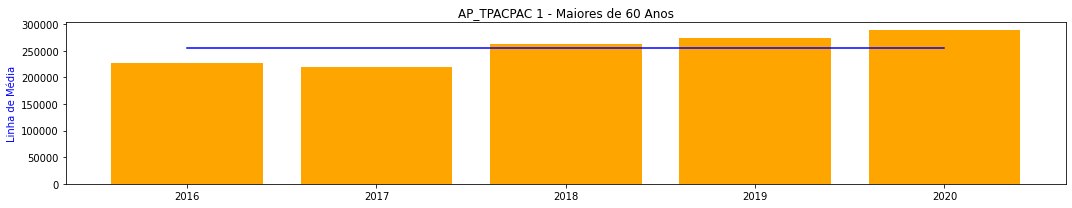

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
TPAPAC = 1
print('TPAPAC=',TPAPAC)
for ano in dfTPAPAC.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + ' | Var.: ' + str( dfTPAPAC.VARIACAO[ (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)].values[0]))

x = dfTPAPAC.ANO[ (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y = dfTPAPAC.QTD[ (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
print('Valor da Qtd. Média: ', y.mean())
axes.bar(x, y, color='orange')
axes.set_title('AP_TPACPAC '+str(TPAPAC)+' - Maiores de 60 Anos')

y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

fig.tight_layout()

AP_TPAPAC = 2

TPAPAC= 2
2016 | Var.: 0.0
2017 | Var.: -2.9333209142032217
2018 | Var.: 18.22270947683569
2019 | Var.: 4.877143071656562
2020 | Var.: -5.13346386917523
Valor da Qtd. Média:  469251.6


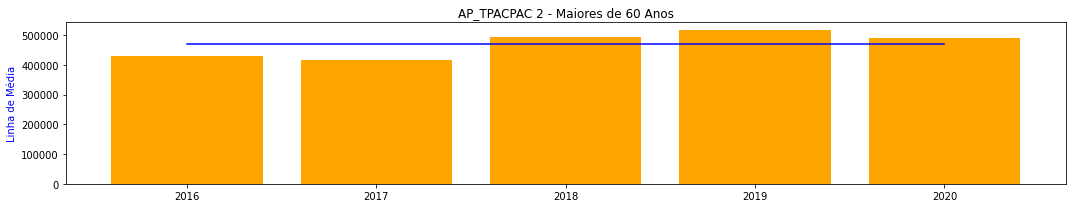

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
TPAPAC = 2
print('TPAPAC=',TPAPAC)
for ano in dfTPAPAC.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + ' | Var.: ' + str( dfTPAPAC.VARIACAO[ (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)].values[0]))

x = dfTPAPAC.ANO[ (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y = dfTPAPAC.QTD[ (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes.bar(x, y, color='orange')
axes.set_title('AP_TPACPAC '+str(TPAPAC)+' - Maiores de 60 Anos')

# criando a linha de média
print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

#--

fig.tight_layout()

# AQ_ESTADI -> Estádio – UICC (0;1;2;3;4)

In [ ]:
# Eu não sei a importancia desse campo, vou fazer a analise apenas dos dados. 
# Sem aplicar nenhuma regra de negócio e nem excluir nenhum registro
df_2.AQ_ESTADI.unique()
# array([0., 1., 2., 3., 4.])

array([0., 1., 2., 3., 4.])

In [ ]:
df_2.groupby('AQ_ESTADI')['QTD'].sum()

AQ_ESTADI
0.0      81053
1.0     913962
2.0    1248138
3.0     930747
4.0     444740
Name: QTD, dtype: int64

In [ ]:
print('Média de todos AQ_ESTADI:', df_2.groupby('AQ_ESTADI')['QTD'].sum().mean())

Média de todos AQ_ESTADI: 723728.0


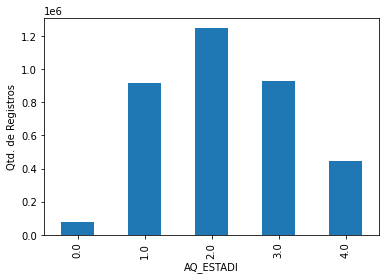

In [ ]:
df_2.groupby('AQ_ESTADI')['QTD'].sum().plot.bar(ylabel='Qtd. de Registros')

In [ ]:
anos = df_2.ANO.sort_values().unique()
AQ_ESTADI = df_2.AQ_ESTADI.sort_values().unique()
v_dados = []
for ano in anos:
  for estadi in AQ_ESTADI:
    qtd_atual = df_2.QTD[(df_2.ANO == ano ) & (df_2.AQ_ESTADI == estadi)].sum()
    qtd_ant = df_2.QTD[(df_2.ANO == int(ano)-1 ) & (df_2.AQ_ESTADI == estadi)].sum()
    linha = [ano, estadi, qtd_atual, 0 if ano==2016 else ((qtd_atual / qtd_ant)*100)-100  ]
    v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfAQ_ESTADI = pd.DataFrame(v_dados, columns=['ANO','AQ_ESTADI','QTD', 'VARIACAO'])
#dfAQ_ESTADI.head()

AQ_ESTADI = 0.0

ESTADI= 0
2016Qtd: 12806  | Var.: 0.0
2017Qtd: 15693  | Var.: 22.544119943776366
2018Qtd: 17269  | Var.: 10.042694194863941
2019Qtd: 17536  | Var.: 1.5461231107765343
2020Qtd: 17749  | Var.: 1.2146441605839442
Valor da Qtd. Média:  16210.6


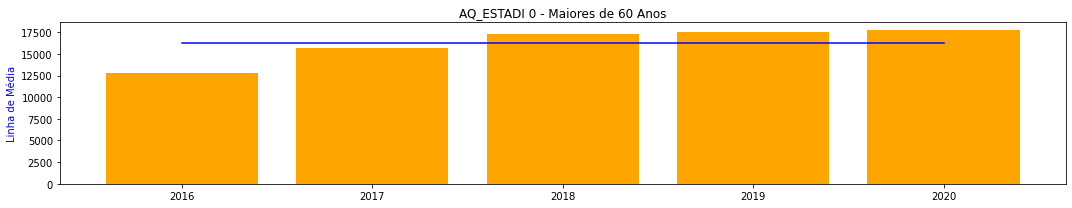

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
ESTADI = 0
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + 'Qtd:',dfAQ_ESTADI.QTD[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0],  ' | Var.:' , dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x = dfAQ_ESTADI.ANO[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y = dfAQ_ESTADI.QTD[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes.bar(x, y,color = "orange")
axes.set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

# criando a linha de média
print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

#--


fig.tight_layout()

AQ_ESTADI = 1.0

ESTADI= 1
2016Qtd: 170872  | Var.: 0.0
2017Qtd: 163375  | Var.: -4.3874947328994836
2018Qtd: 192463  | Var.: 17.8044376434583
2019Qtd: 197376  | Var.: 2.552698440739263
2020Qtd: 189876  | Var.: -3.7998540856031155
Valor da Qtd. Média:  182792.4


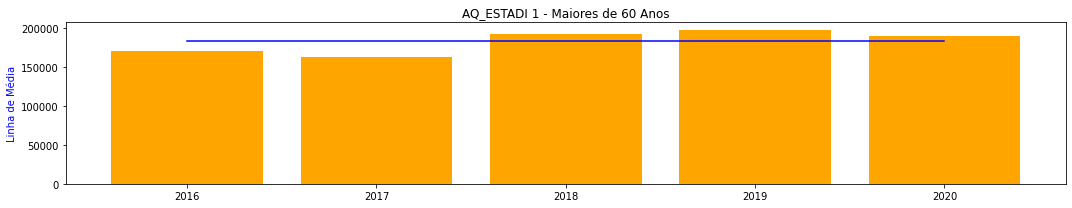

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
ESTADI = 1
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + 'Qtd:',dfAQ_ESTADI.QTD[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0],  ' | Var.:' , dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x = dfAQ_ESTADI.ANO[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y = dfAQ_ESTADI.QTD[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes.bar(x, y,color = "orange")
axes.set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

# criando a linha de média
print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

#--


fig.tight_layout()

AQ_ESTADI = 2.0

ESTADI= 2
2016Qtd: 230239  | Var.: 0.0
2017Qtd: 224374  | Var.: -2.547352968002812
2018Qtd: 260182  | Var.: 15.959068341251665
2019Qtd: 268687  | Var.: 3.2688656402057035
2020Qtd: 264656  | Var.: -1.500258665287106
Valor da Qtd. Média:  249627.6


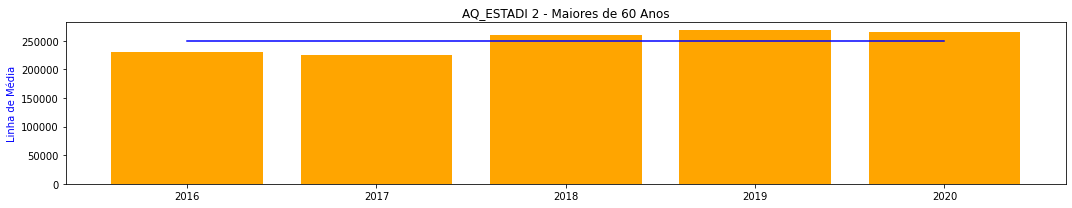

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
ESTADI = 2
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + 'Qtd:',dfAQ_ESTADI.QTD[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0],  ' | Var.:' , dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x = dfAQ_ESTADI.ANO[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y = dfAQ_ESTADI.QTD[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes.bar(x, y,color = "orange")
axes.set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

# criando a linha de média
print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

#--


fig.tight_layout()

AQ_ESTADI = 3.0

ESTADI= 3
2016Qtd: 166255  | Var.: 0.0
2017Qtd: 160214  | Var.: -3.6335749300772875
2018Qtd: 193500  | Var.: 20.775962150623542
2019Qtd: 207012  | Var.: 6.982945736434104
2020Qtd: 203766  | Var.: -1.568025042026548
Valor da Qtd. Média:  186149.4


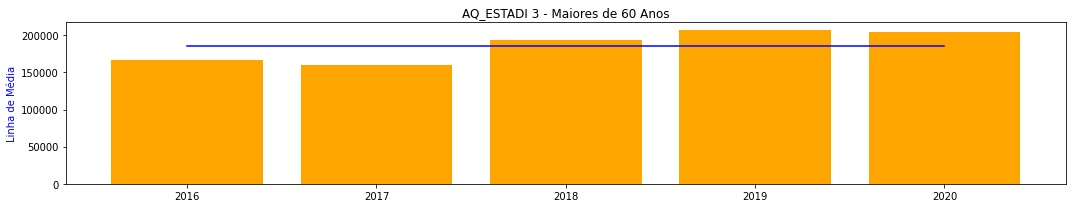

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
ESTADI = 3
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + 'Qtd:',dfAQ_ESTADI.QTD[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0],  ' | Var.:' , dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x = dfAQ_ESTADI.ANO[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y = dfAQ_ESTADI.QTD[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes.bar(x, y,color = "orange")
axes.set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

# criando a linha de média
print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

#--


fig.tight_layout()

AQ_ESTADI = 4.0

ESTADI= 4
2016Qtd: 76710  | Var.: 0.0
2017Qtd: 73470  | Var.: -4.223699648025018
2018Qtd: 91192  | Var.: 24.12141009936029
2019Qtd: 100357  | Var.: 10.050223703833666
2020Qtd: 103011  | Var.: 2.6445589246390426
Valor da Qtd. Média:  88948.0


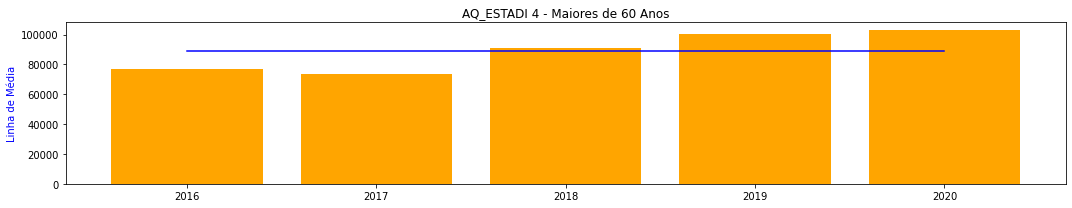

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
ESTADI = 4
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(str(ano) + 'Qtd:',dfAQ_ESTADI.QTD[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0],  ' | Var.:' , dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x = dfAQ_ESTADI.ANO[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y = dfAQ_ESTADI.QTD[ (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes.bar(x, y,color = "orange")
axes.set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

# criando a linha de média
print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')

#--


fig.tight_layout()

# Analise de Toda a Base de Dados por Estado

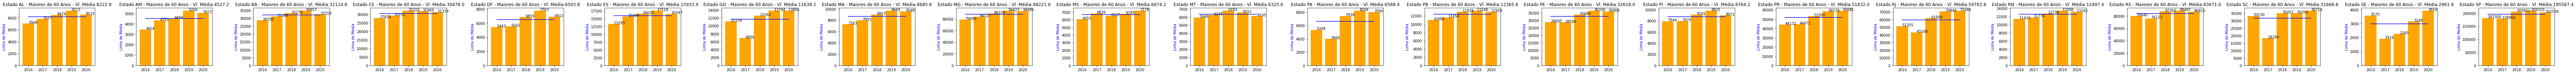

In [ ]:
'''UFs = ['AL','AM','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB','PE','PI','PR','RJ','RN','RS','SC','SE','SP']
fig, axes = plt.subplots(nrows=1, ncols=len(UFs), figsize=(100,3))
i=0
for uf in UFs:
  filtro = (df_2["ESTADO_UF"]==uf)
  df_est = df_2[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
  x = df_est.ANO
  y = df_est.QTD
  axes[i].bar(x, y,color = "orange")
  axes[i].set_title('Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
  for idx in range(0,len(x)):
    axes[i].text(x[idx], y[idx], y[idx], fontsize=10)

  # criando a linha de média
  #print('Valor da Qtd. Média: ', y.mean())
  y_media = [ y.mean() for y1 in y ]
  axes[i].set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
  axes[i].plot(x, y_media, color='b')
  #--
  i=i+1
fig.tight_layout()'''

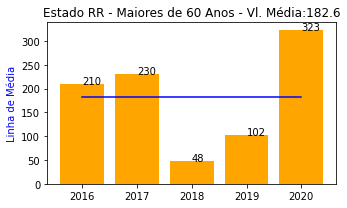

In [ ]:
'''
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3))

uf = 'RR'
filtro = (df_2["ESTADO_UF"]==uf)
df_est = df_2[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
x = df_est.ANO
y = df_est.QTD
axes.bar(x, y,color = "orange")
axes.set_title('Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
for idx in range(0,len(x)):
  axes.text(x[idx], y[idx], y[idx], fontsize=10)

# criando a linha de média
#print('Valor da Qtd. Média: ', y.mean())
y_media = [ y.mean() for y1 in y ]
axes.set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
axes.plot(x, y_media, color='b')
#--
i=i+1
fig.tight_layout()'''

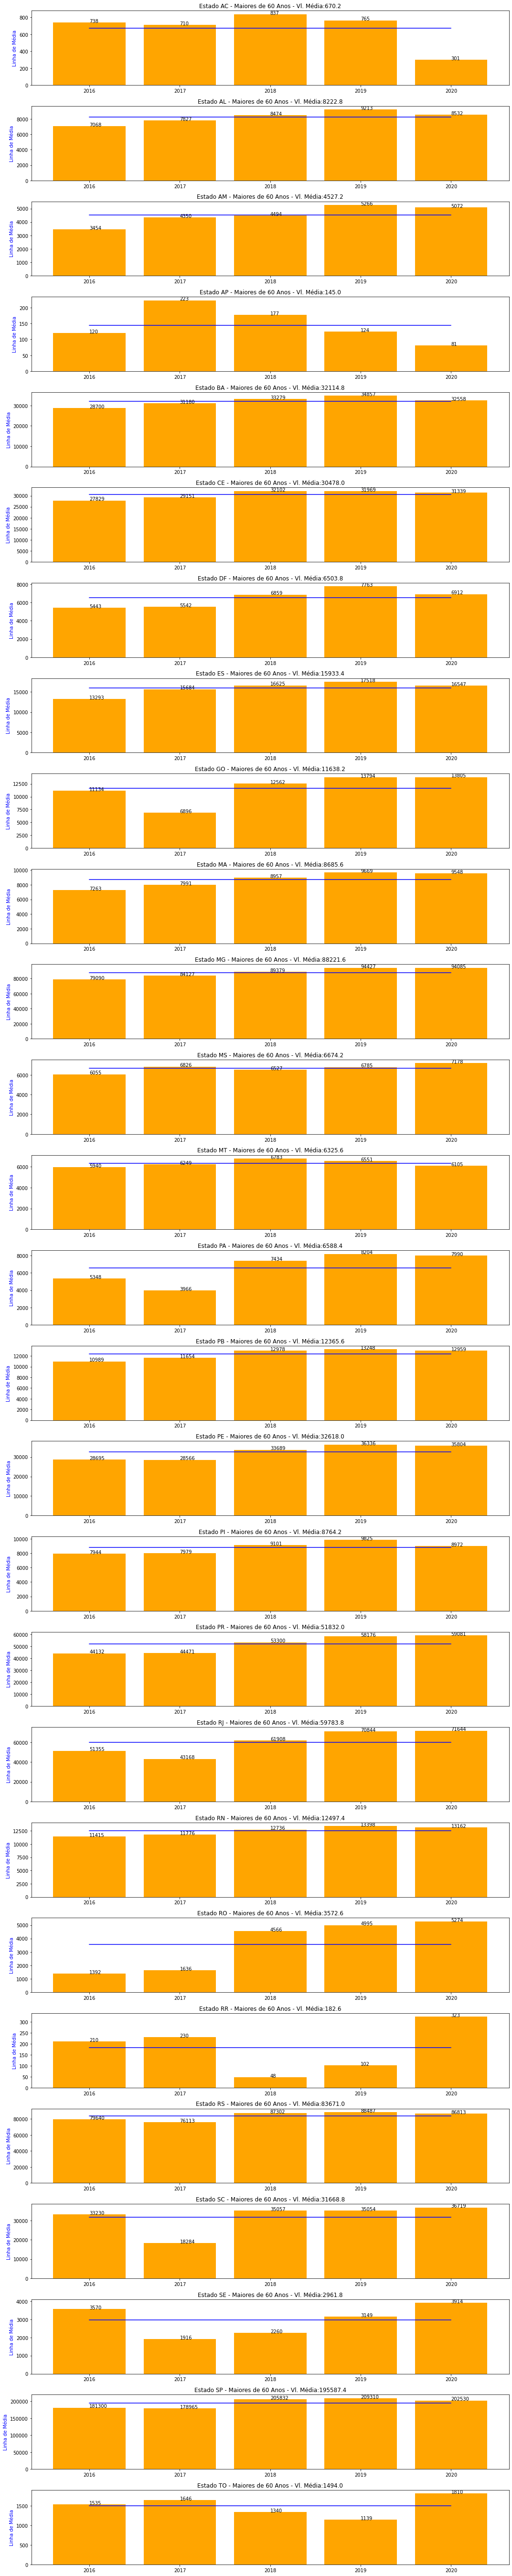

In [ ]:
# Vamos imprimir dois graficos para cada estado apresentando o numero de registros em cada ano de cada estado por faixa de idade
n_estados = df_2.ESTADO_UF.sort_values().unique()
fig, axes = plt.subplots(nrows=len(n_estados), ncols=1, figsize=(15,75))
i = 0
for uf in n_estados:
  filtro = (df_2["ESTADO_UF"]==uf)
  df_est = df_2[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
  x = df_est.ANO
  y = df_est.QTD
  axes[i].bar(x, y,color = "orange")
  axes[i].set_title('Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
  for idx in range(0,len(x)):
    axes[i].text(x[idx], y[idx], y[idx], fontsize=10)

  # criando a linha de média
  #print('Valor da Qtd. Média: ', y.mean())
  y_media = [ y.mean() for y1 in y ]
  axes[i].set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
  axes[i].plot(x, y_media, color='b')
  #--
  i=i+1
fig.tight_layout()

# Estado por TPAPAC

In [ ]:
df_2.AP_TPAPAC.unique()

array([1, 2])

In [ ]:
def graficoEstadoPorTPAPAC(df, tpapac):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=1, figsize=(10,50))
  i = 0
  for uf in n_estados:
    filtro= (df["ESTADO_UF"]==uf) & (df['AP_TPAPAC']== tpapac)
    df_est = df_2[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
    x = df_est.ANO
    y = df_est.QTD
    axes[i].bar(x, y,color = "orange")
    axes[i].set_title('TPACPAC: '+str(tpapac)+' | Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
    for idx in range(0,len(x)):
      axes[i].text(x[idx], y[idx], y[idx], fontsize=10)

    # criando a linha de média
    #print('Valor da Qtd. Média: ', y.mean())
    y_media = [ y.mean() for y1 in y ]
    axes[i].set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
    axes[i].plot(x, y_media, color='b')
    #--
    i=i+1
  fig.tight_layout()

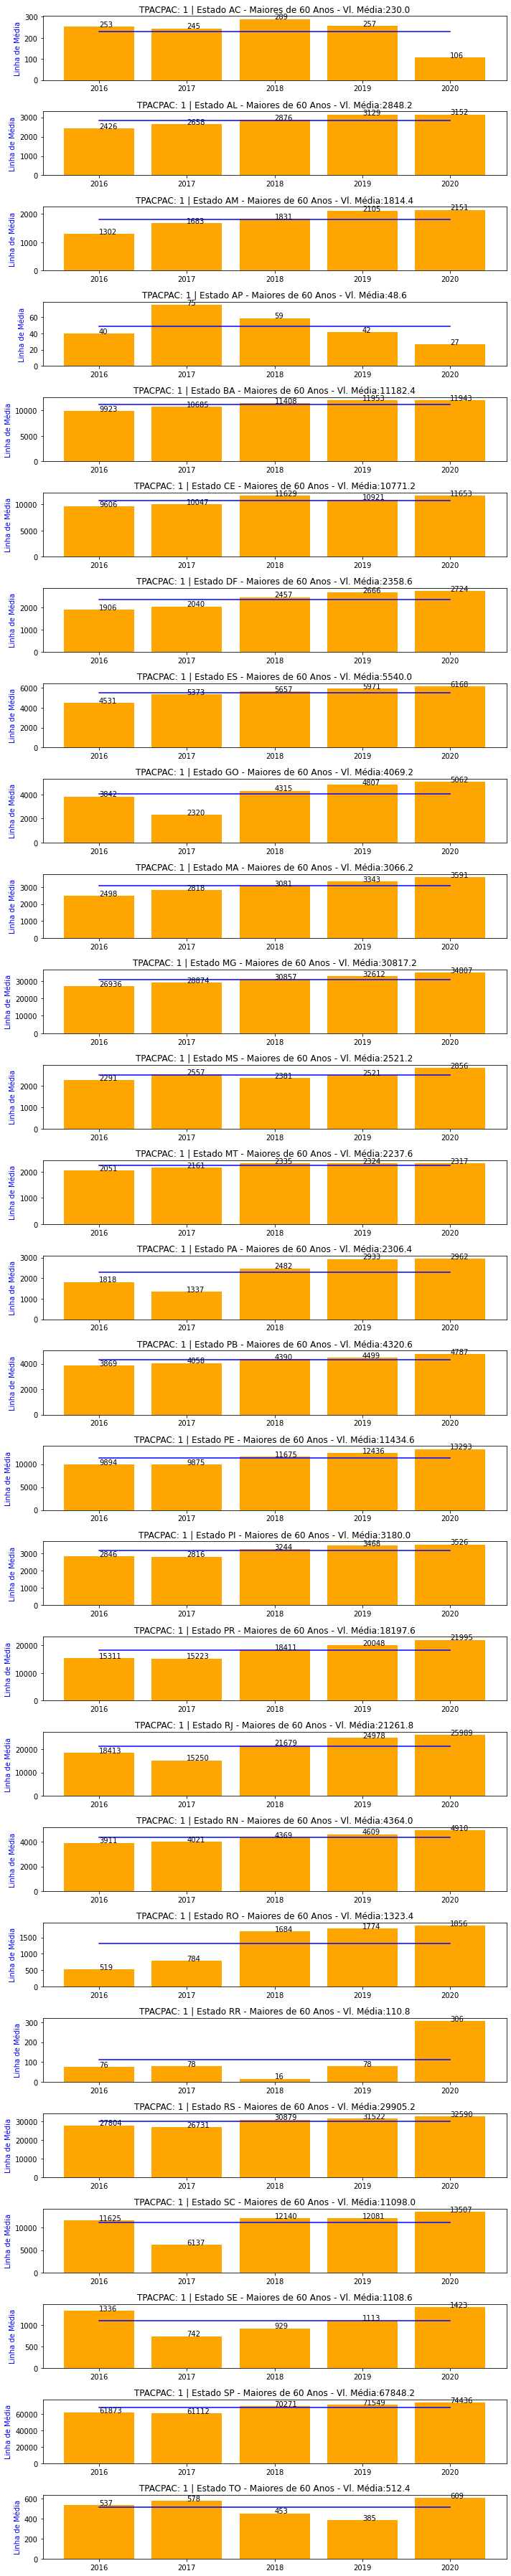

In [ ]:
#TPAPAC=1
graficoEstadoPorTPAPAC(df_2, 1)

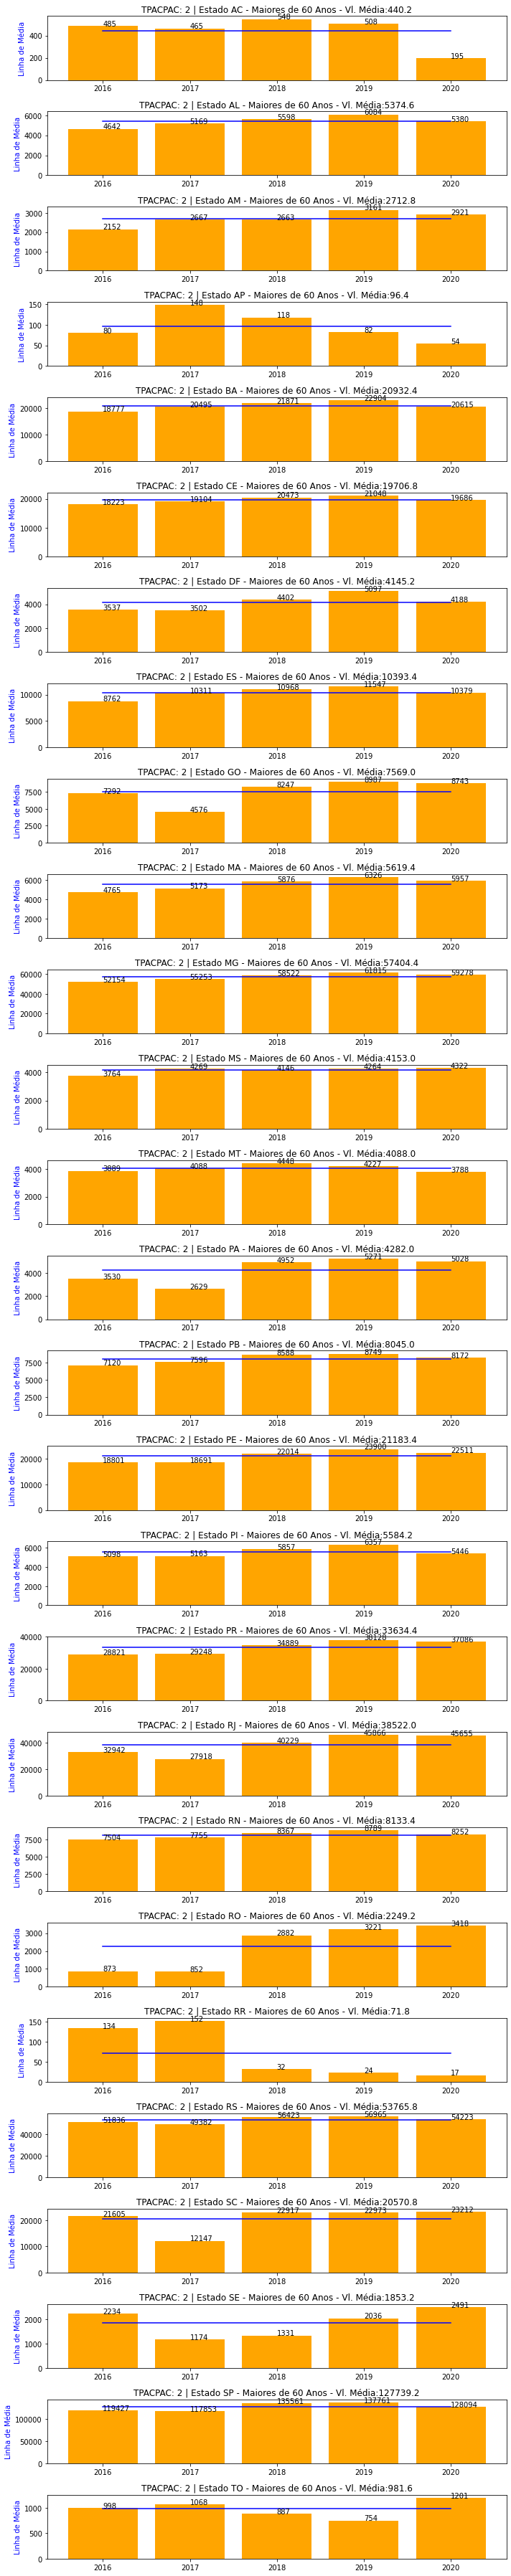

In [ ]:
#TPAPAC=2
graficoEstadoPorTPAPAC(df_2, 2)

# Estado por AQ_ESTADI

In [ ]:
df_2.AQ_ESTADI.unique()

array([0., 1., 2., 3., 4.])

In [ ]:
# Estado por AQ_ESTADI -> Estádio – UICC (0;1;2;3;4)
def graficoEstadoPorAQ_ESTADI(df, estadi):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=1, figsize=(10,40))
  i = 0
  for uf in n_estados:
    filtro = (df["ESTADO_UF"]==uf) & (df['AQ_ESTADI']== estadi)
    df_est = df_2[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
    x = df_est.ANO
    y = df_est.QTD
    axes[i].bar(x, y,color = "orange")
    axes[i].set_title('AQ_ESTADI: '+str(estadi)+' -  Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
    axes[i].set_xticks(x)
    #axes[i].get_xaxis().get_major_formatter().set_scientific(False)
    #axes[i].get_xaxis().get_major_formatter().set_useOffset(False)
    for idx in range(0,len(x)):
      axes[i].text(x[idx], y[idx], y[idx], fontsize=10)

    # criando a linha de média
    #print('Valor da Qtd. Média: ', y.mean())
    y_media = [ y.mean() for y1 in y ]
    axes[i].set_ylabel('Linha de Média', color='b') #cria o rótula do segundo eixo
    axes[i].plot(x, y_media, color='b')
    #--
    i=i+1
  fig.tight_layout()

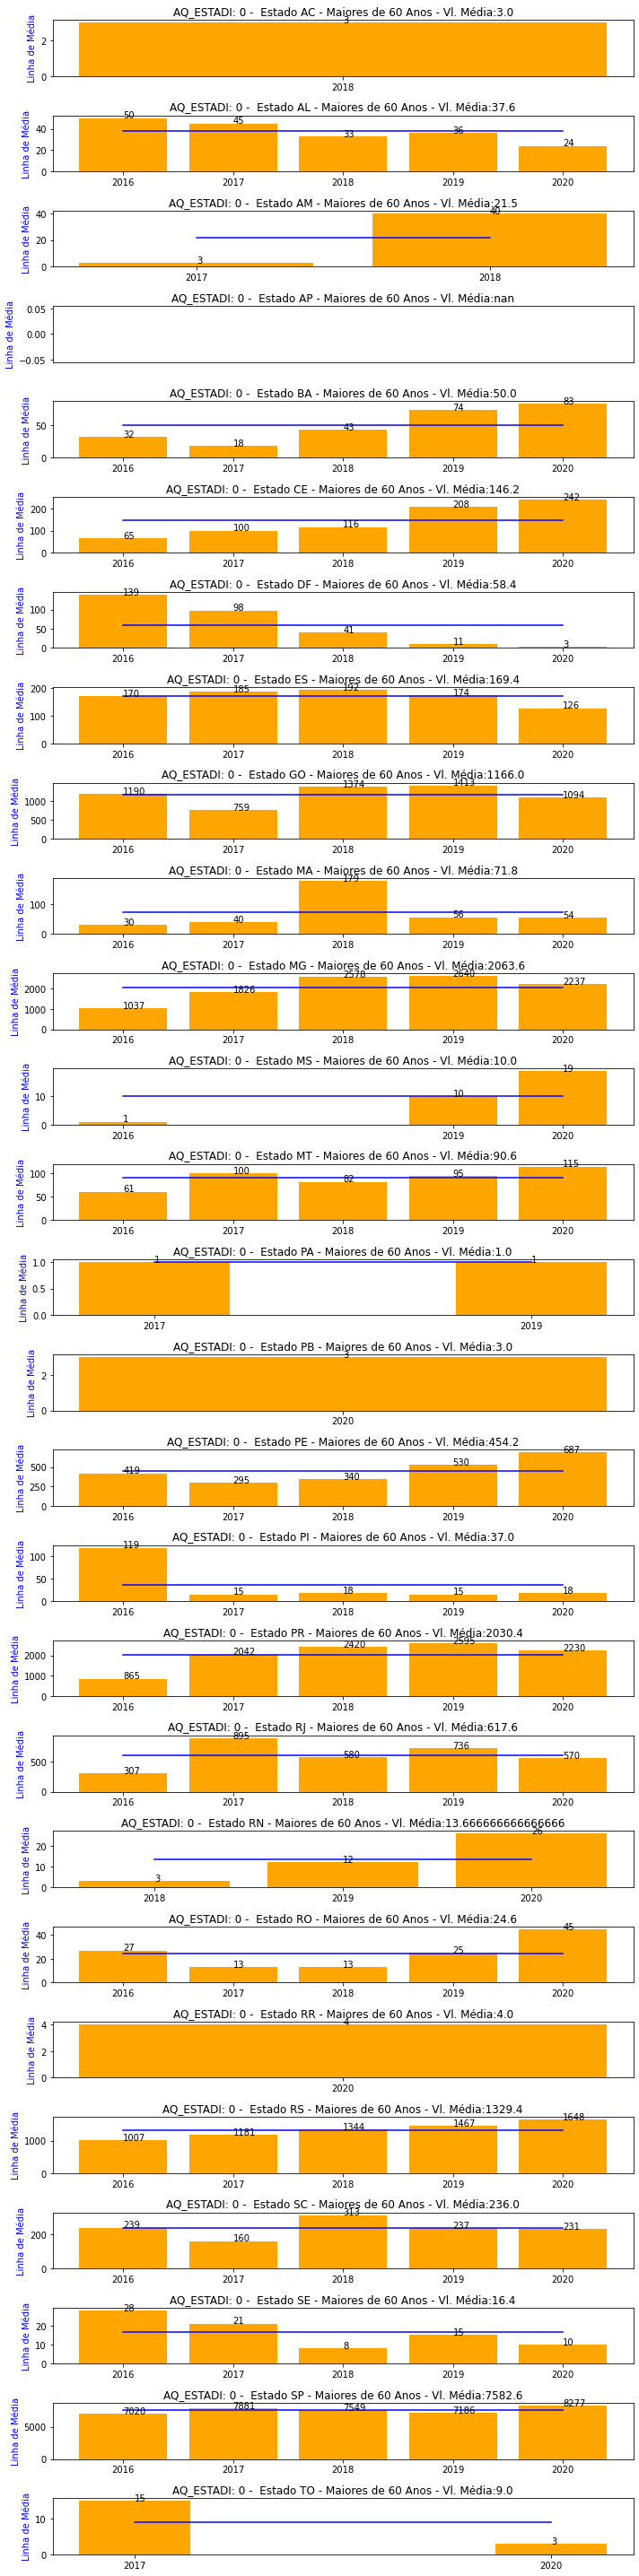

In [ ]:
#AQ_ESTADI=0
graficoEstadoPorAQ_ESTADI(df_2, 0)

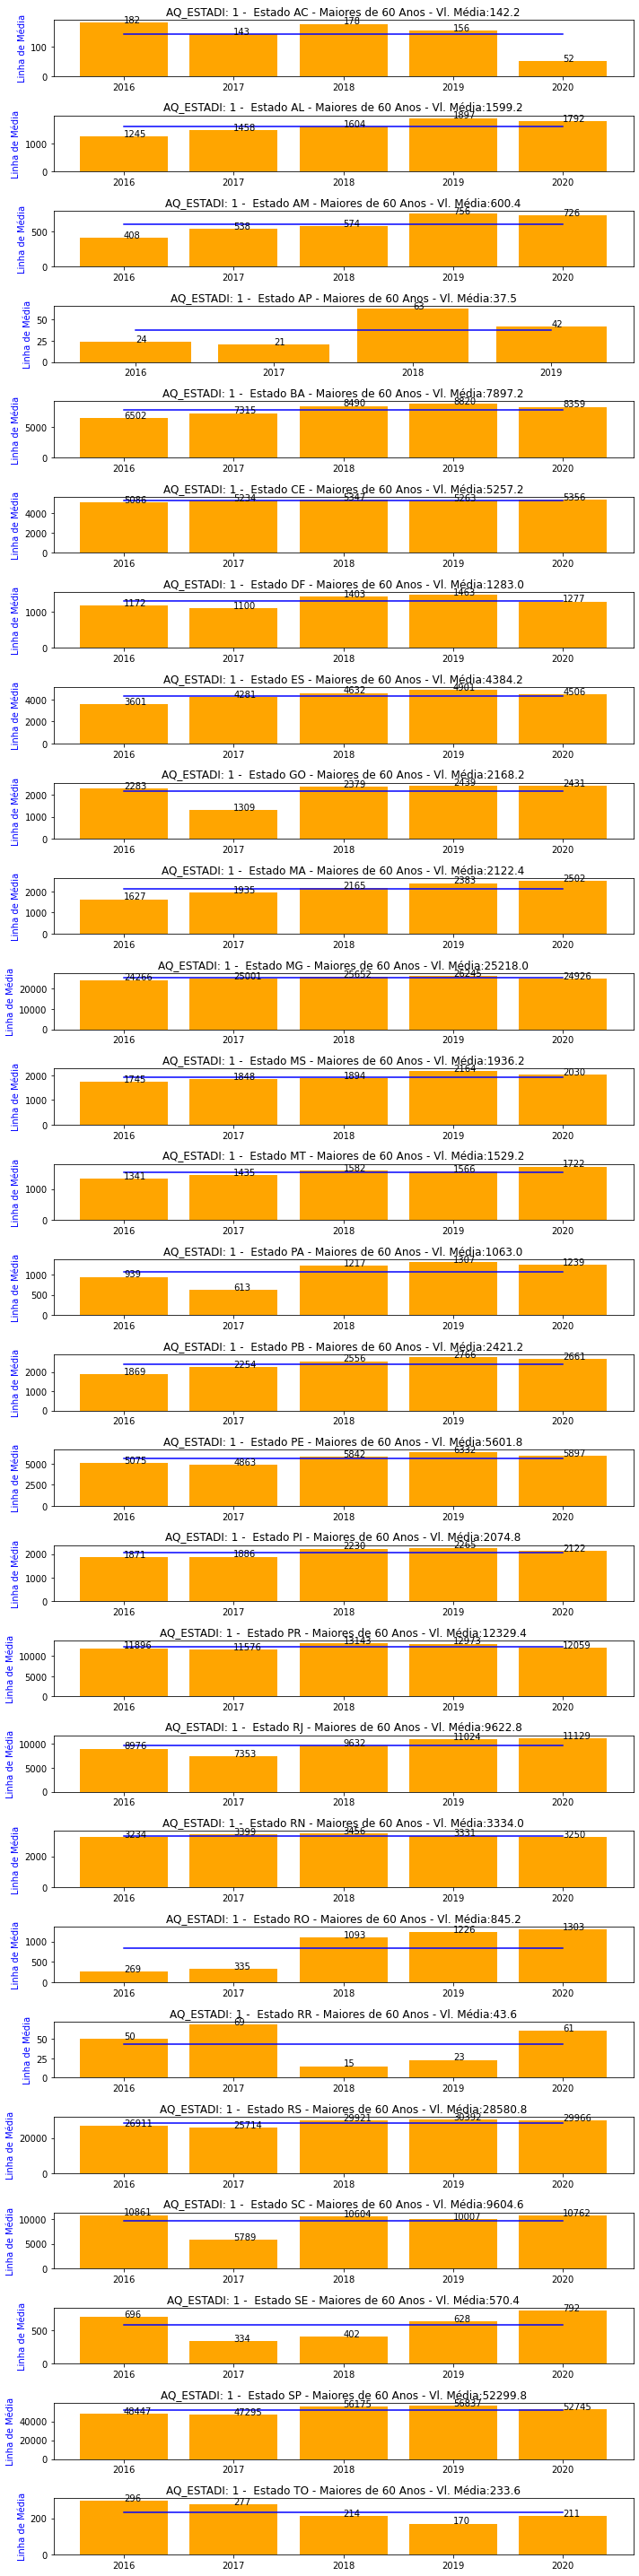

In [ ]:
#AQ_ESTADI=1
graficoEstadoPorAQ_ESTADI(df_2, 1)

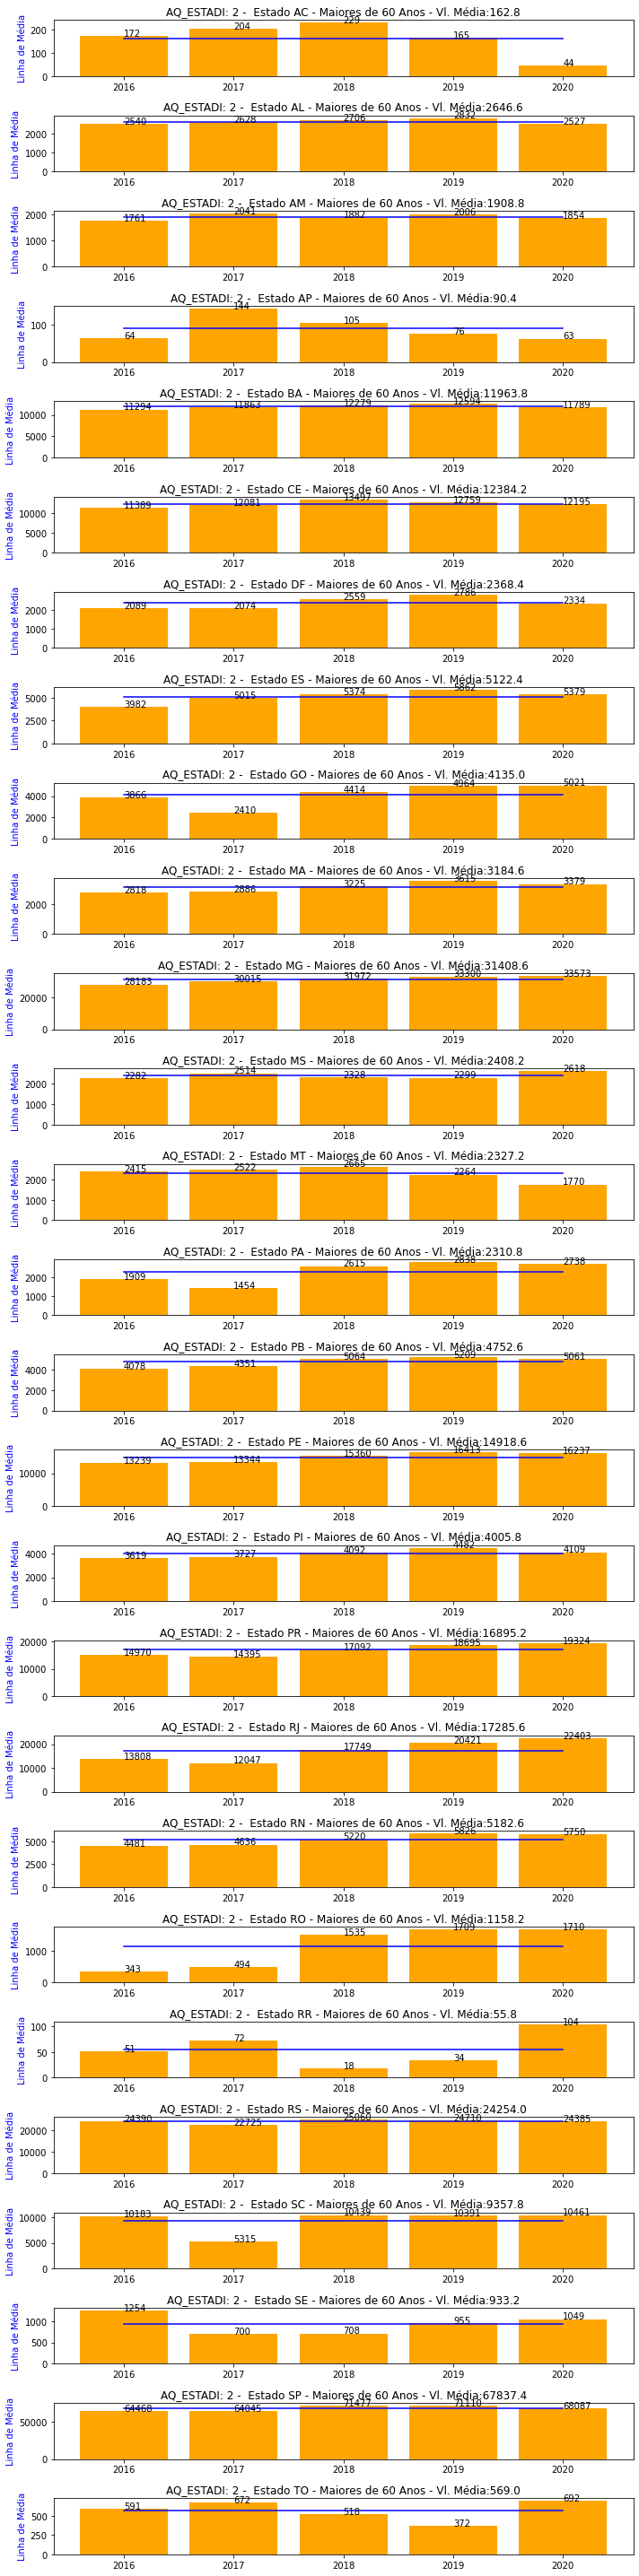

In [ ]:
#AQ_ESTADI=2
graficoEstadoPorAQ_ESTADI(df_2, 2)

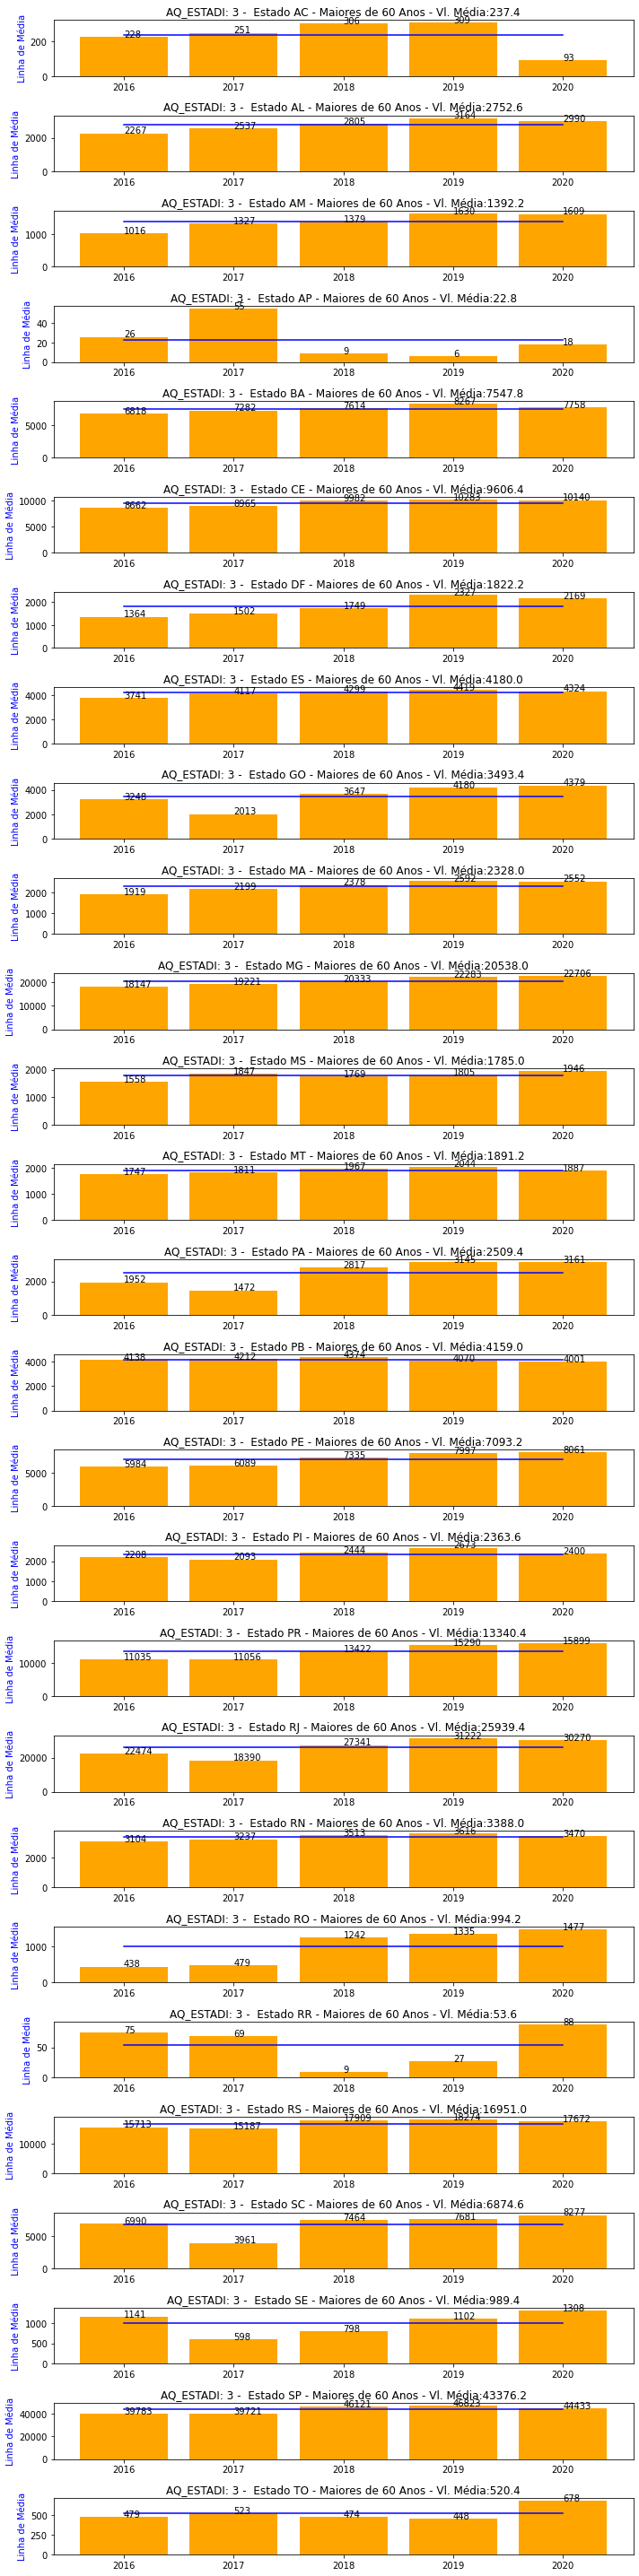

In [ ]:
#AQ_ESTADI=3
graficoEstadoPorAQ_ESTADI(df_2, 3)

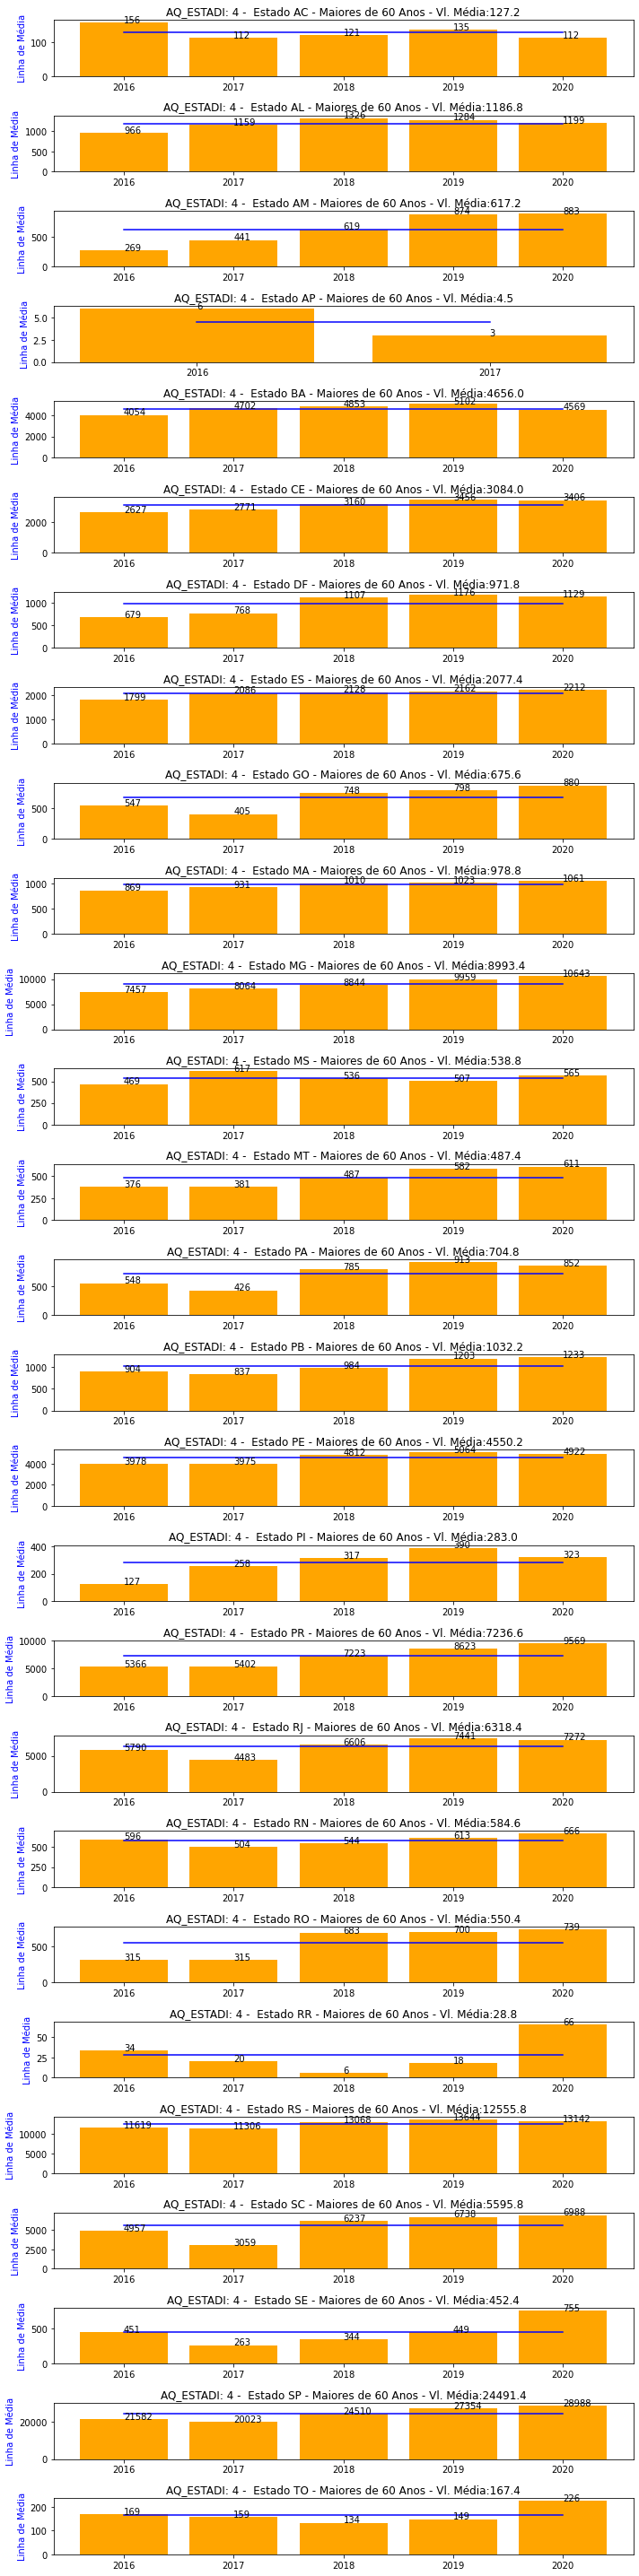

In [ ]:
#AQ_ESTADI=4
graficoEstadoPorAQ_ESTADI(df_2, 4)

# Por Datas

In [ ]:
df_2["DTSOLIC"] = df_2["DTSOLIC"].astype("datetime64")

Todos os Dados por mês

In [ ]:
print('Média por mês:', df_2.groupby([df_2["DTSOLIC"].dt.month])['QTD'].sum().mean())

Média por mês: 301553.3333333333


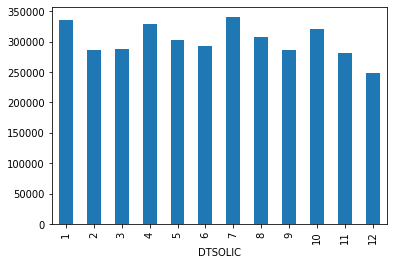

In [ ]:
# Todos os Dados por mês
df_2.groupby([df_2["DTSOLIC"].dt.month])['QTD'].sum().plot(kind='bar')

# Por anos e meses do ano

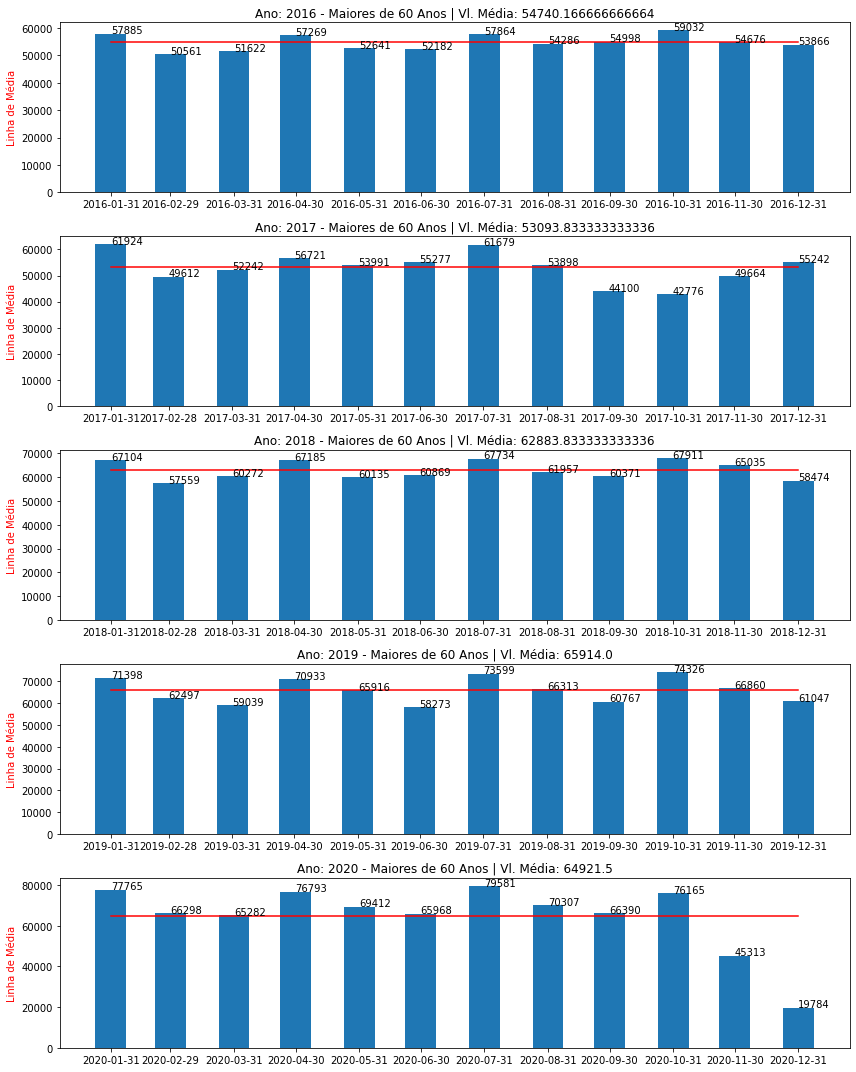

In [ ]:
anos = df_2.ANO.sort_values().unique()
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(12,15))
i = 0
for ano in anos:    
  filtro =  (df_2['ANO']==ano) 
  df_datas2 = df_2[filtro].sort_values(by=['DTSOLIC']).groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD'].sum()
  x2 = df_datas2.DTSOLIC
  y2 = df_datas2.QTD
  y_labels = df_datas2.QTD

  axes[i].bar(x2, y2,width=15)
  axes[i].set_xticks(x2)
  axes[i].set_ylabel('Qtd. de Registros')
  for idx in range(0,len(x2)):
    axes[i].text(x2[idx], y2[idx], y2[idx], fontsize=10)
  axes[i].set_title('Ano: '+str(ano)+' - Maiores de 60 Anos | Vl. Média: '+str(y2.mean()))
  # criando a linha de média
  #print('Valor da Qtd. Média: ', y.mean())
  y_media = [ y2.mean() for y1 in y2 ]
  axes[i].set_ylabel('Linha de Média', color='r') #cria o rótula do segundo eixo
  axes[i].plot(x2, y_media, color='r')
  i=i+1
fig.tight_layout()

# Por Estado e por Data(Mês/Ano)

In [ ]:
def graficoEstadoPorData(df, uf):
  anos = df.ANO.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(15,15))
  i = 0
  for ano in anos:  
    filtro = (df['MAIOR_60']== 1) & (df['ANO']==ano)  & (df["ESTADO_UF"]==uf)
    df_datas2 = df_2[filtro].groupby(["DTSOLIC"], as_index=False, dropna=False)['QTD'].sum()        
    x2 = df_datas2.DTSOLIC
    y2 = df_datas2.QTD

    axes[i].bar(x2, y2,width=15)
    axes[i].set_xticks(x2)
    axes[i].set_ylabel('Qtd. de Registros')

    for idx in range(0,len(x2)):
      axes[i].text(x2[idx], y2[idx], y2[idx], fontsize=10)

    axes[i].set_title('Estado: '+str(uf)+' | Ano: '+str(ano)+' - Maiores de 60 Anos | Vl. Média: '+str(y2.mean()))
    # criando a linha de média
    #print('Valor da Qtd. Média: ', y.mean())
    y_media = [ y2.mean() for y1 in y2 ]
    axes[i].set_ylabel('Linha de Média', color='r') #cria o rótula do segundo eixo
    axes[i].plot(x2, y_media, color='r')
    i=i+1
  fig.tight_layout()

ACRE

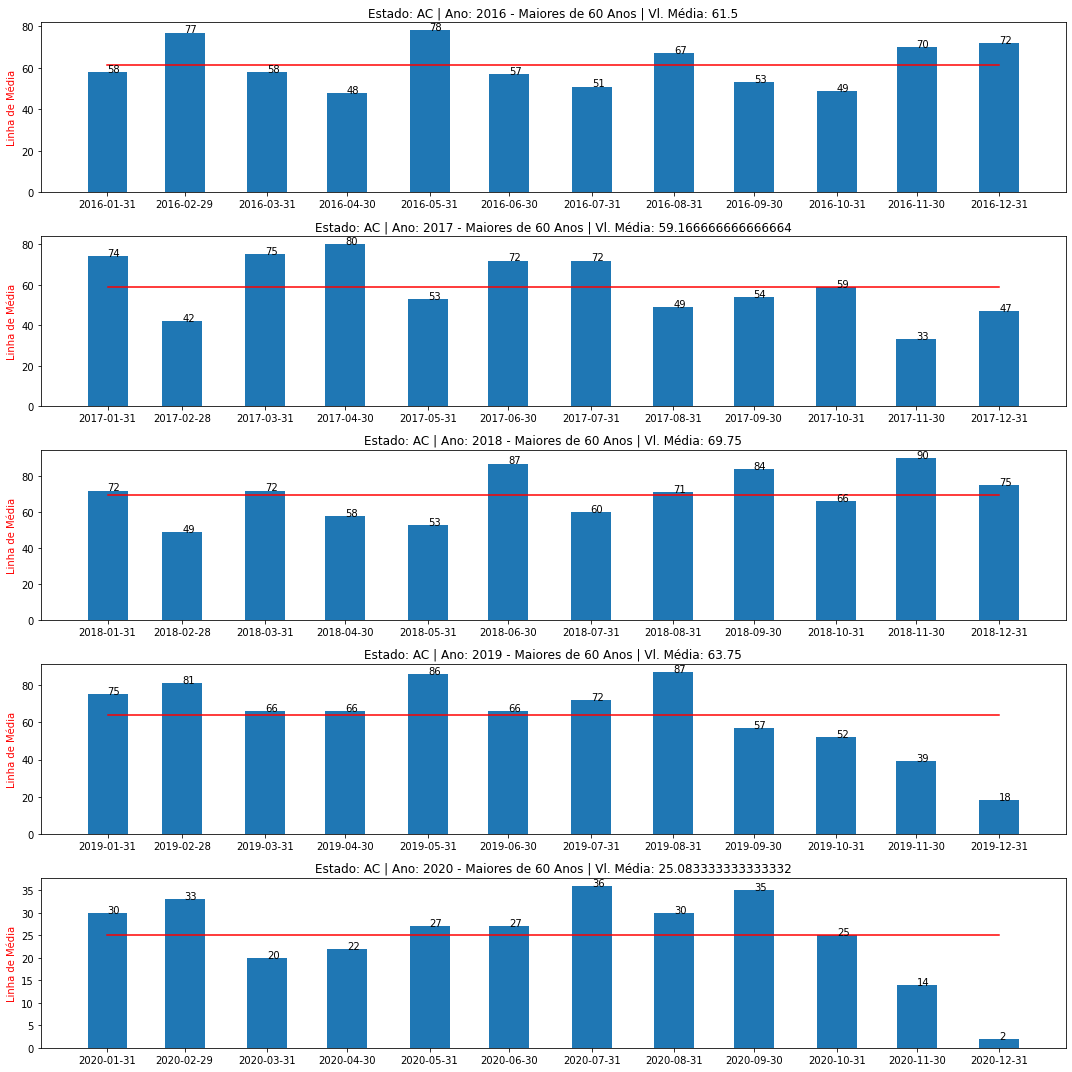

In [ ]:
graficoEstadoPorData(df_2, 'AC')

ALAGOAS

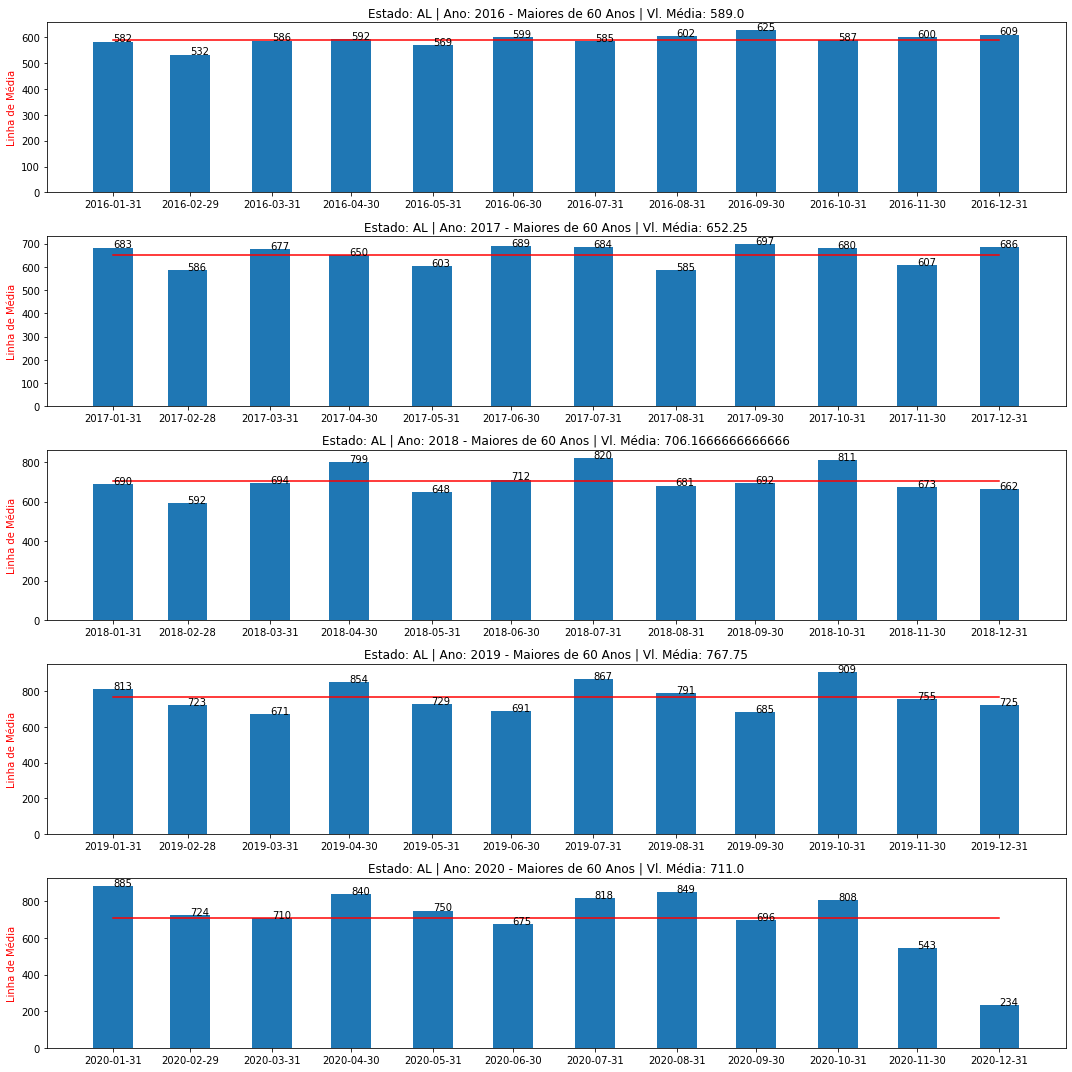

In [ ]:
graficoEstadoPorData(df_2, 'AL')

AMAZONAS

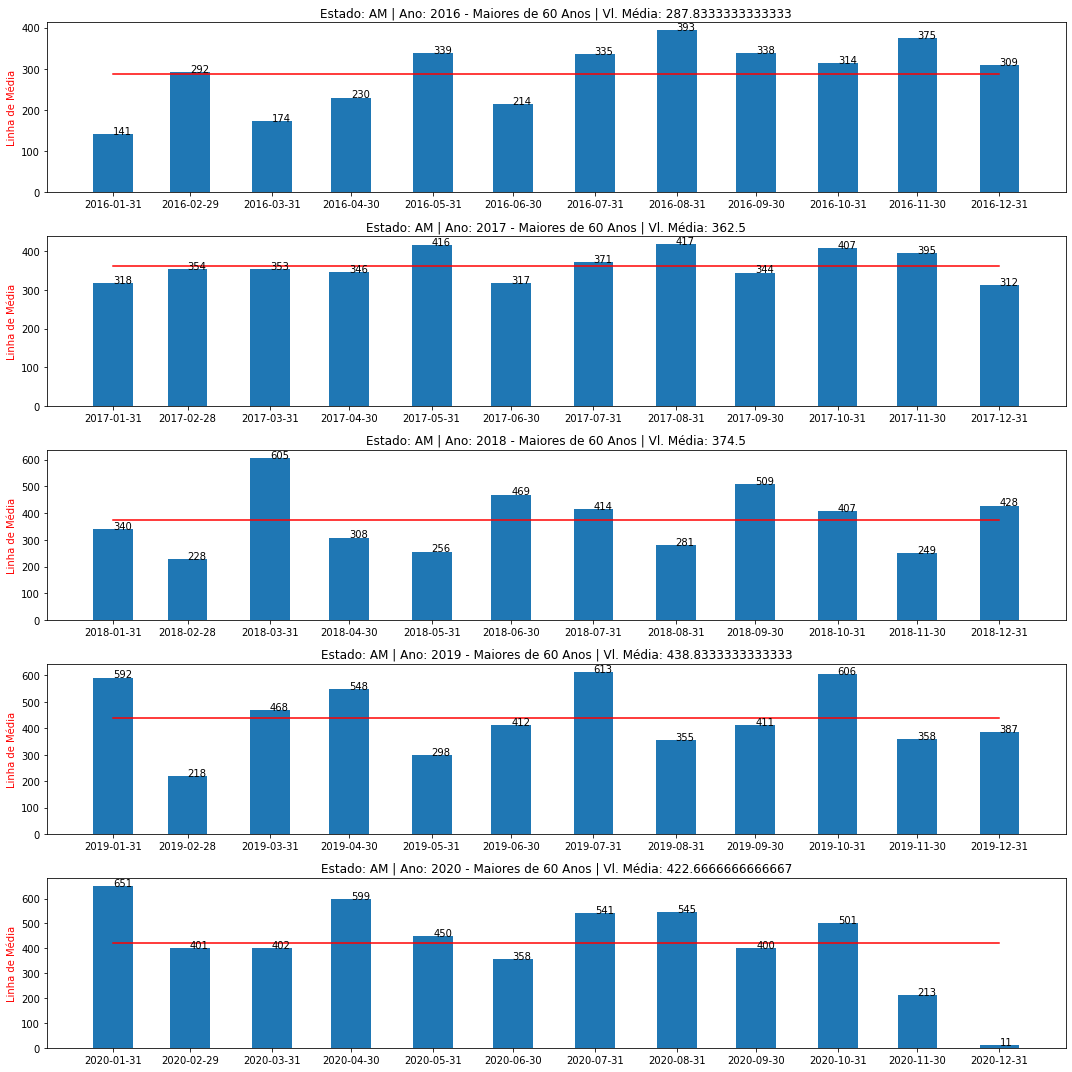

In [ ]:
graficoEstadoPorData(df_2, 'AM')

BAHIA

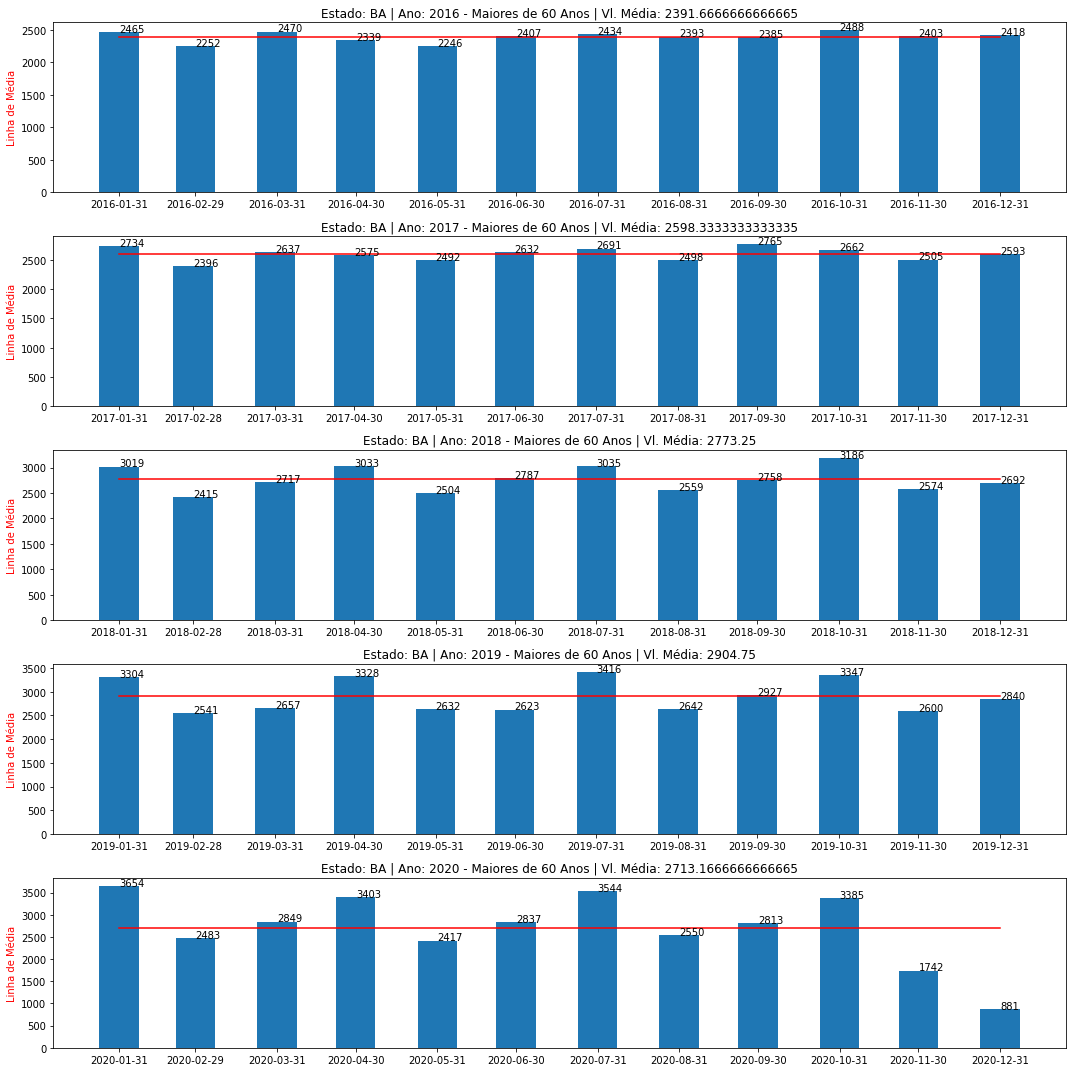

In [ ]:
graficoEstadoPorData(df_2, 'BA')

CEARA

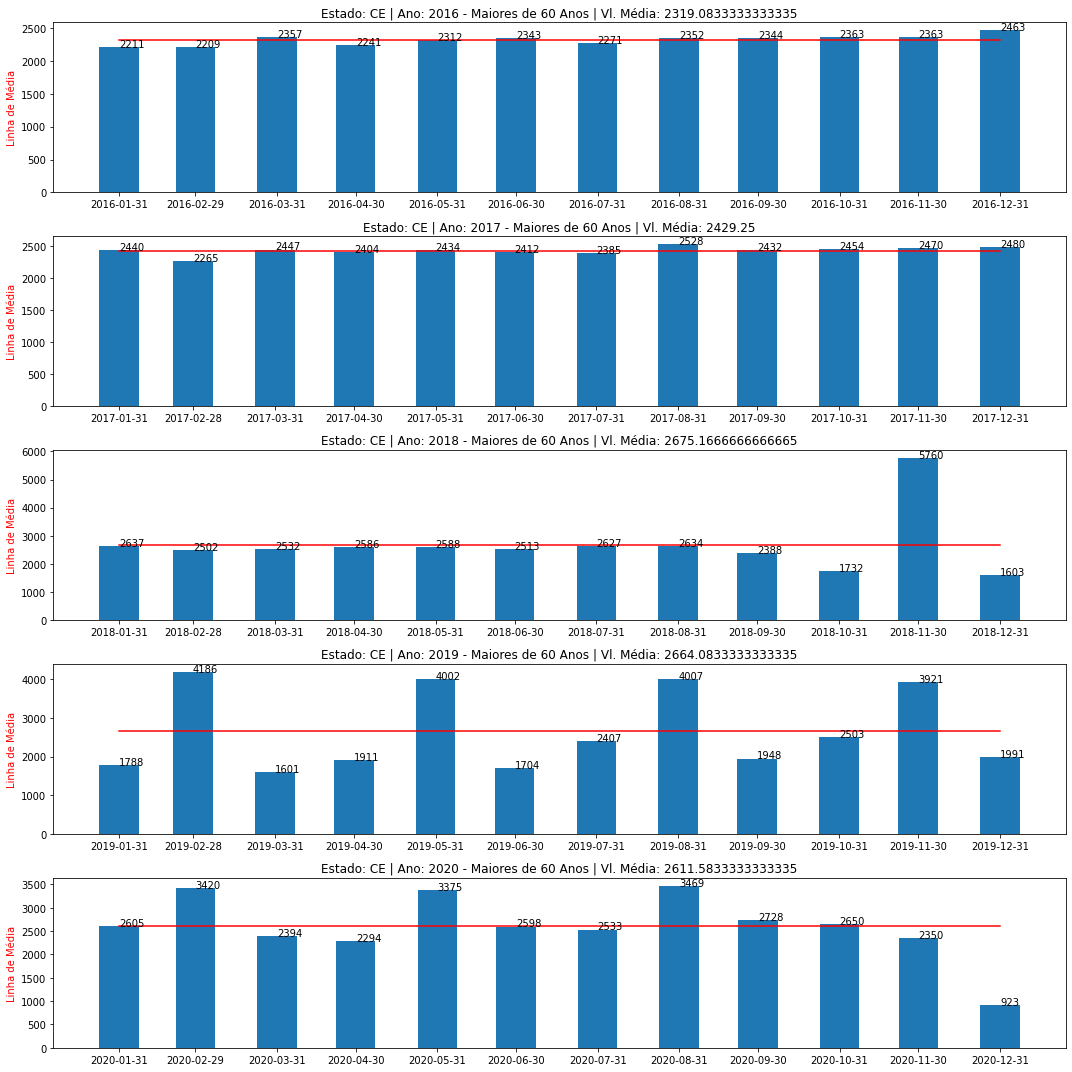

In [ ]:
graficoEstadoPorData(df_2, 'CE')

DISTRITO FEDERAL

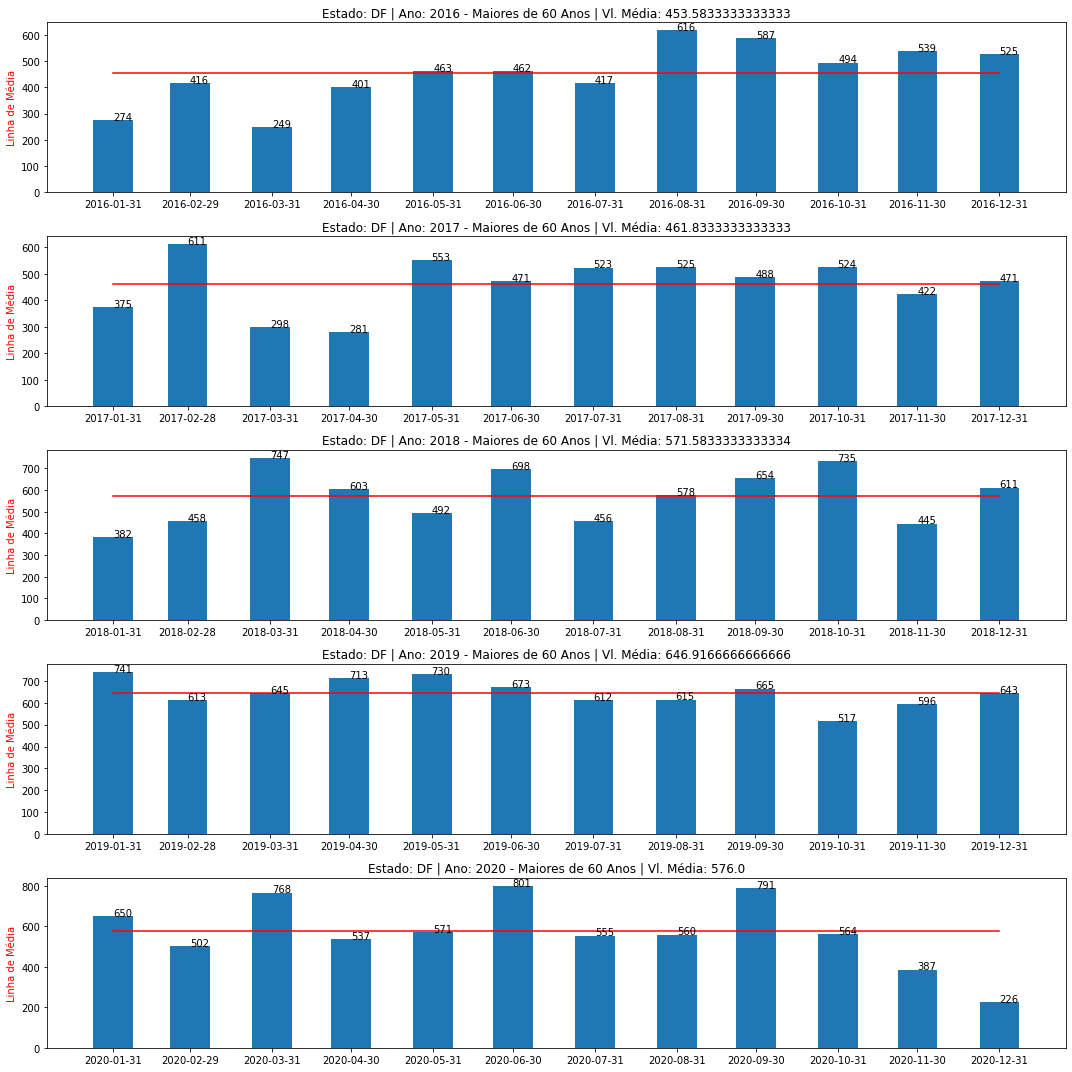

In [ ]:
graficoEstadoPorData(df_2, 'DF')

ESPIRITO SANTO

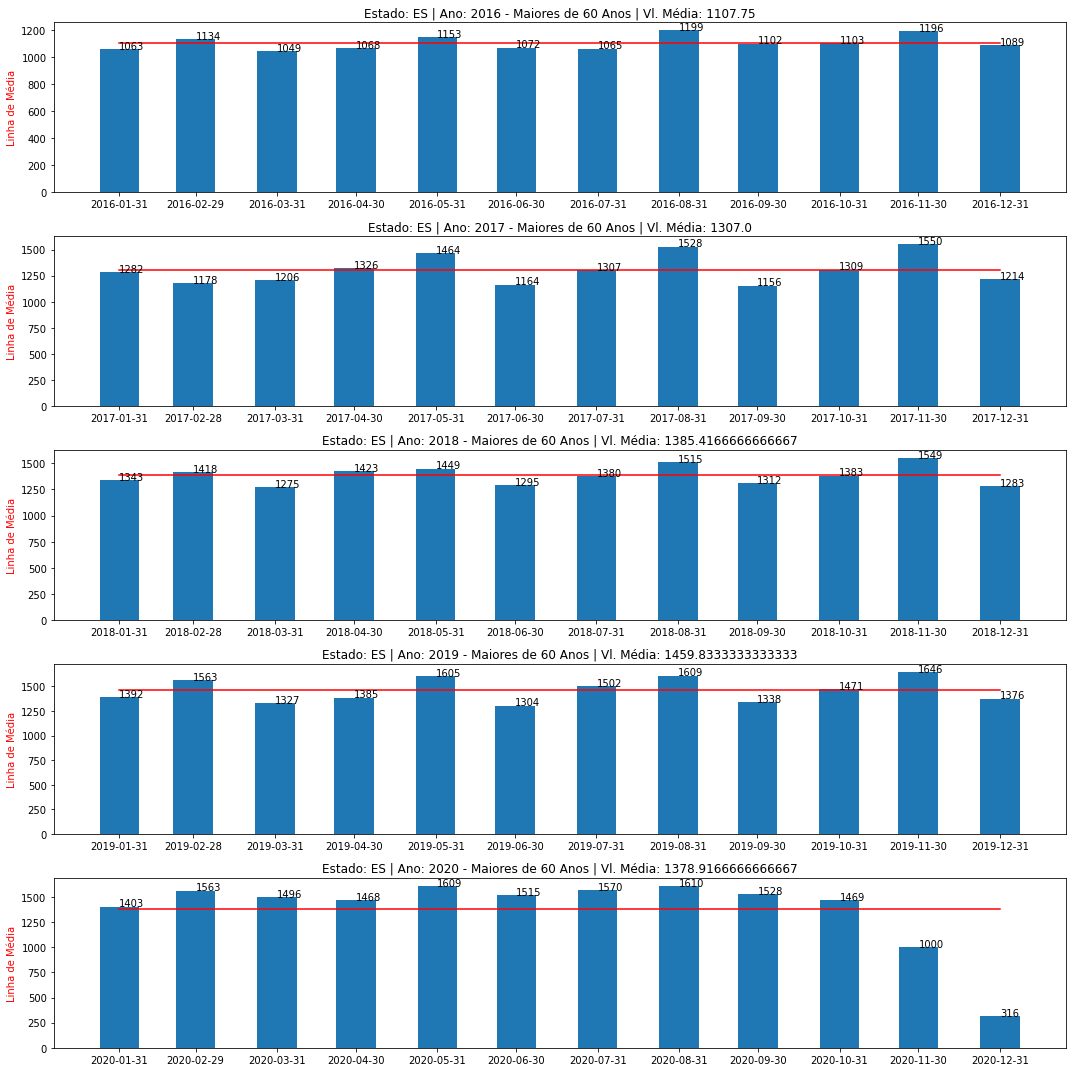

In [ ]:
graficoEstadoPorData(df_2, 'ES')

GOIÁS

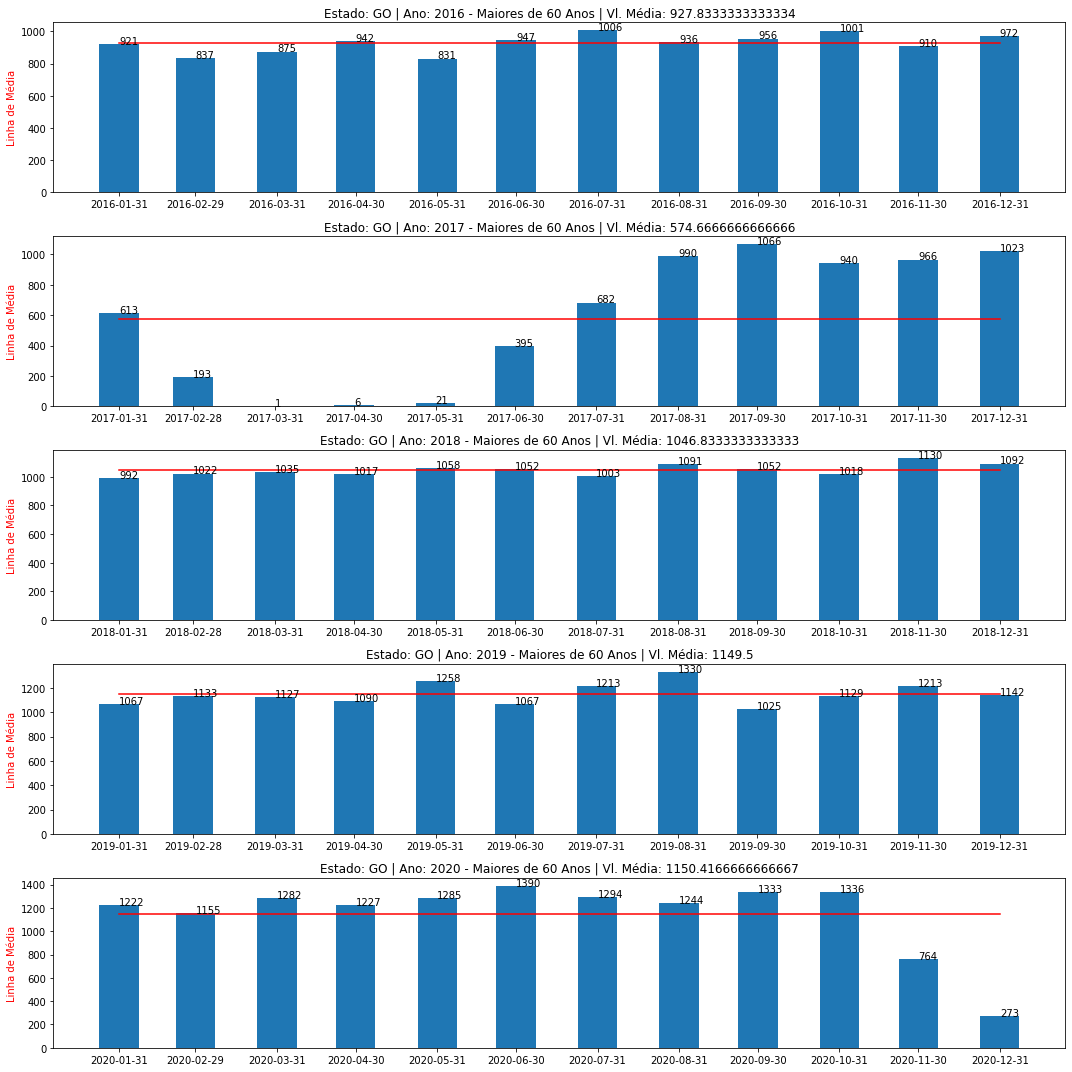

In [ ]:
graficoEstadoPorData(df_2, 'GO')

MARANHÃO

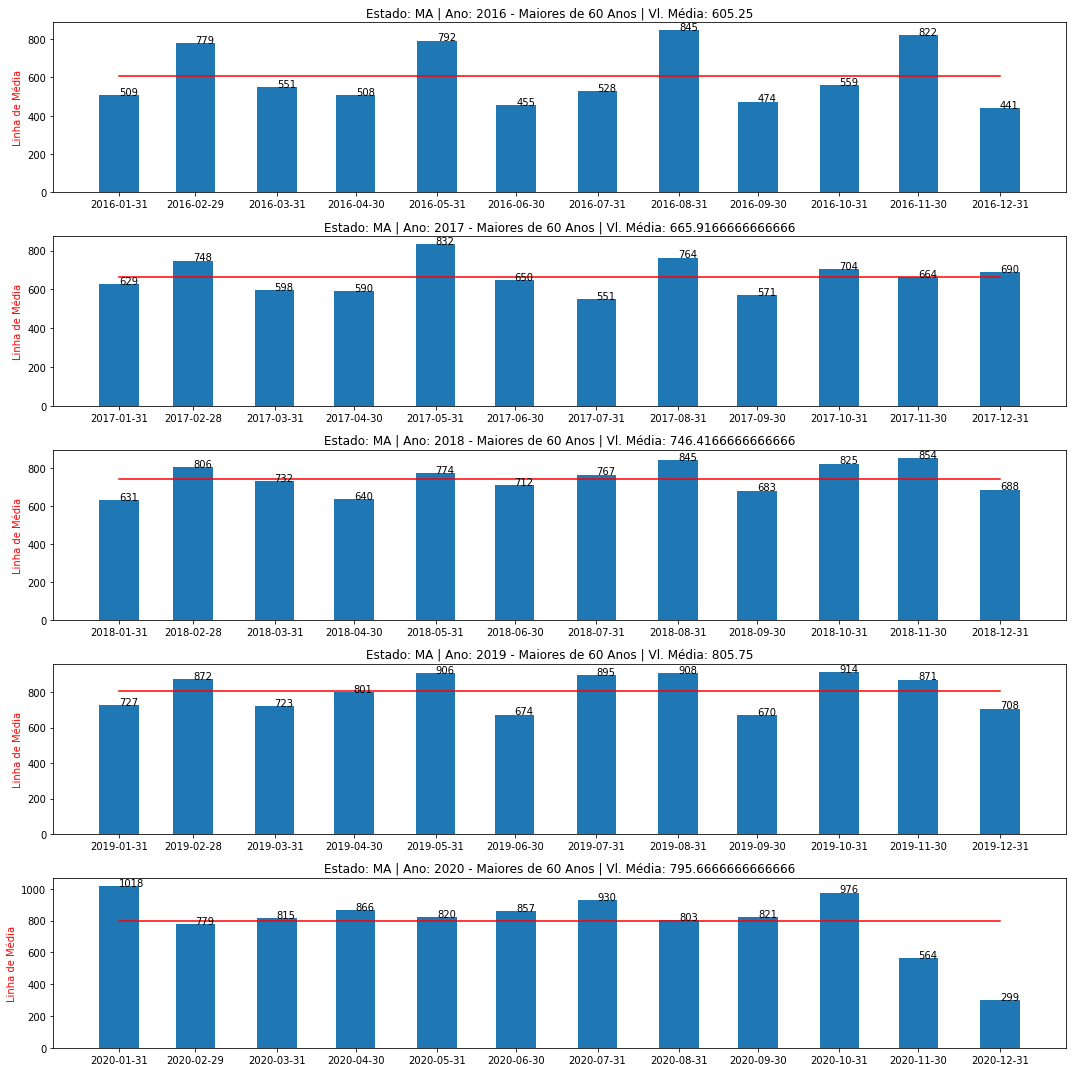

In [ ]:
graficoEstadoPorData(df_2, 'MA')

MINAS GERAIS

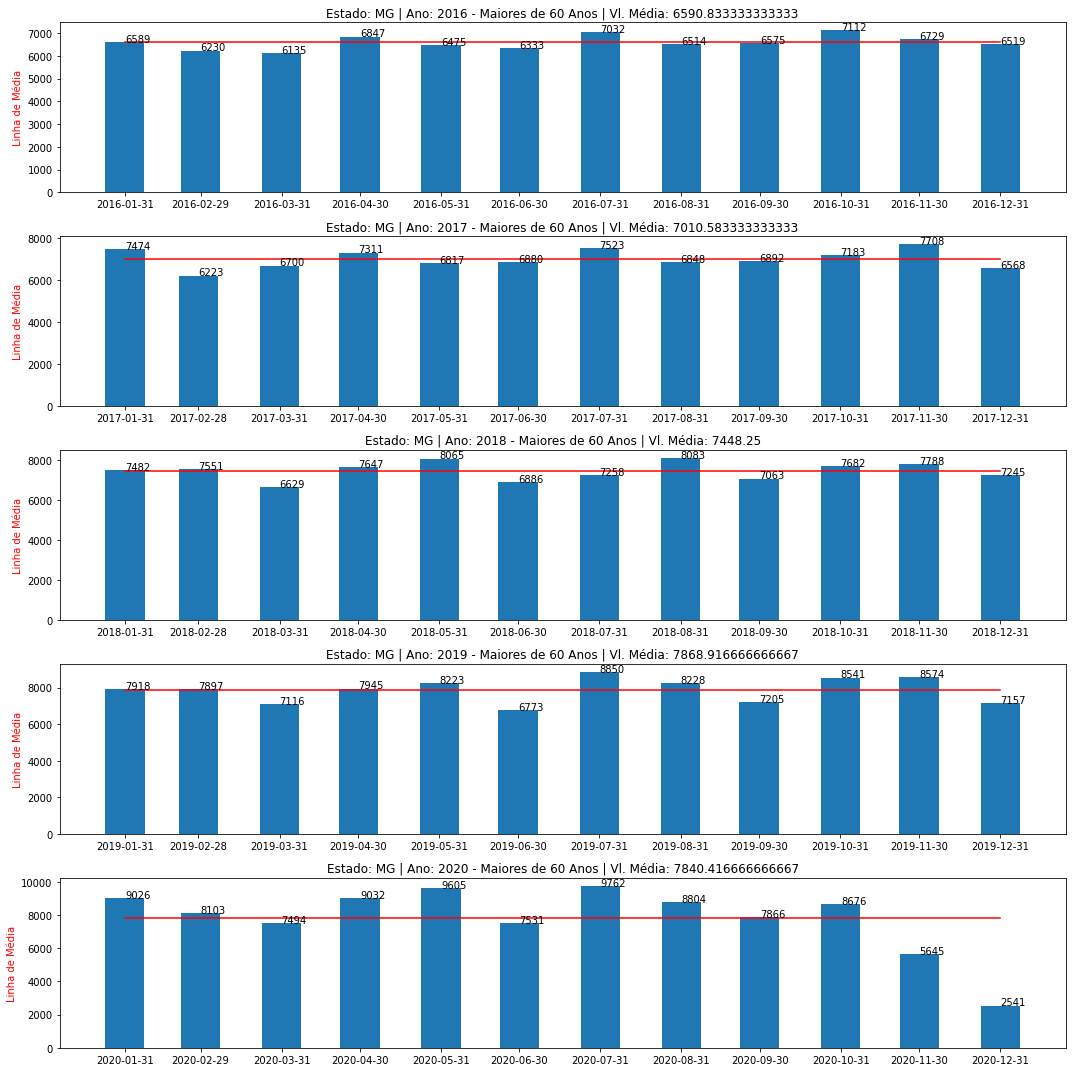

In [ ]:
graficoEstadoPorData(df_2, 'MG')

MATO GROSSO DO SUL

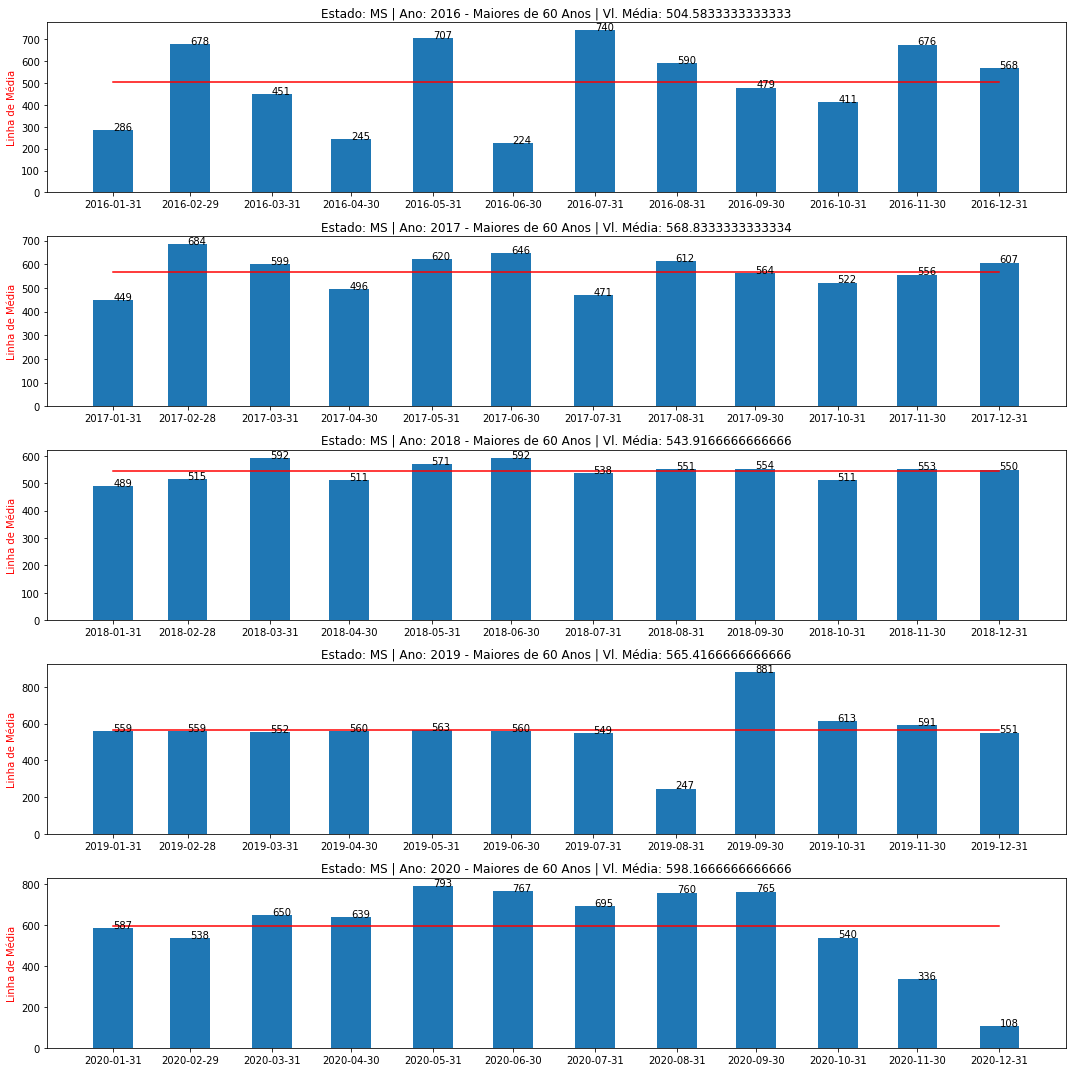

In [ ]:
graficoEstadoPorData(df_2, 'MS')

MATO GROSSO

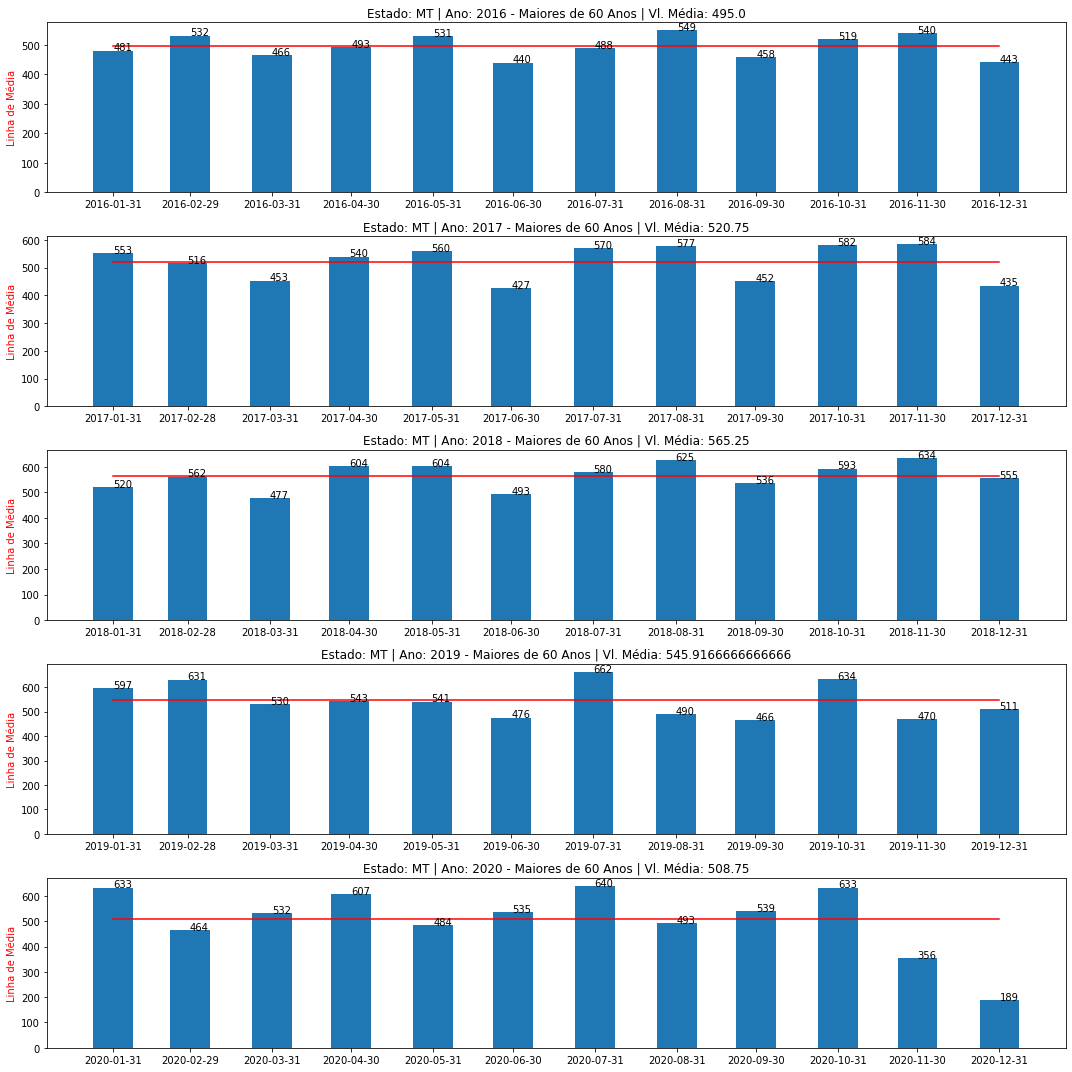

In [ ]:
graficoEstadoPorData(df_2, 'MT') 

PARÁ

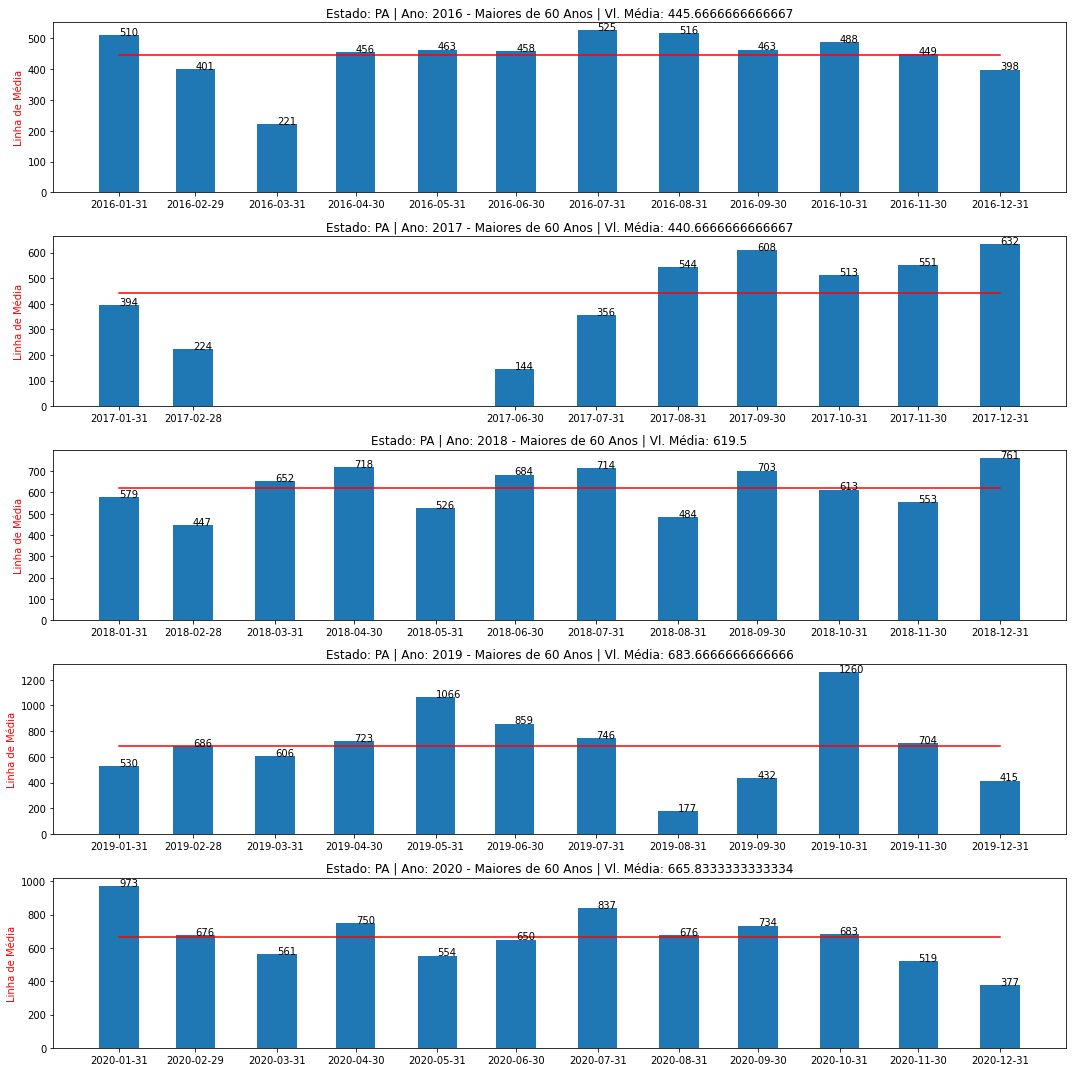

In [ ]:
graficoEstadoPorData(df_2, 'PA') 

PARAÍBA

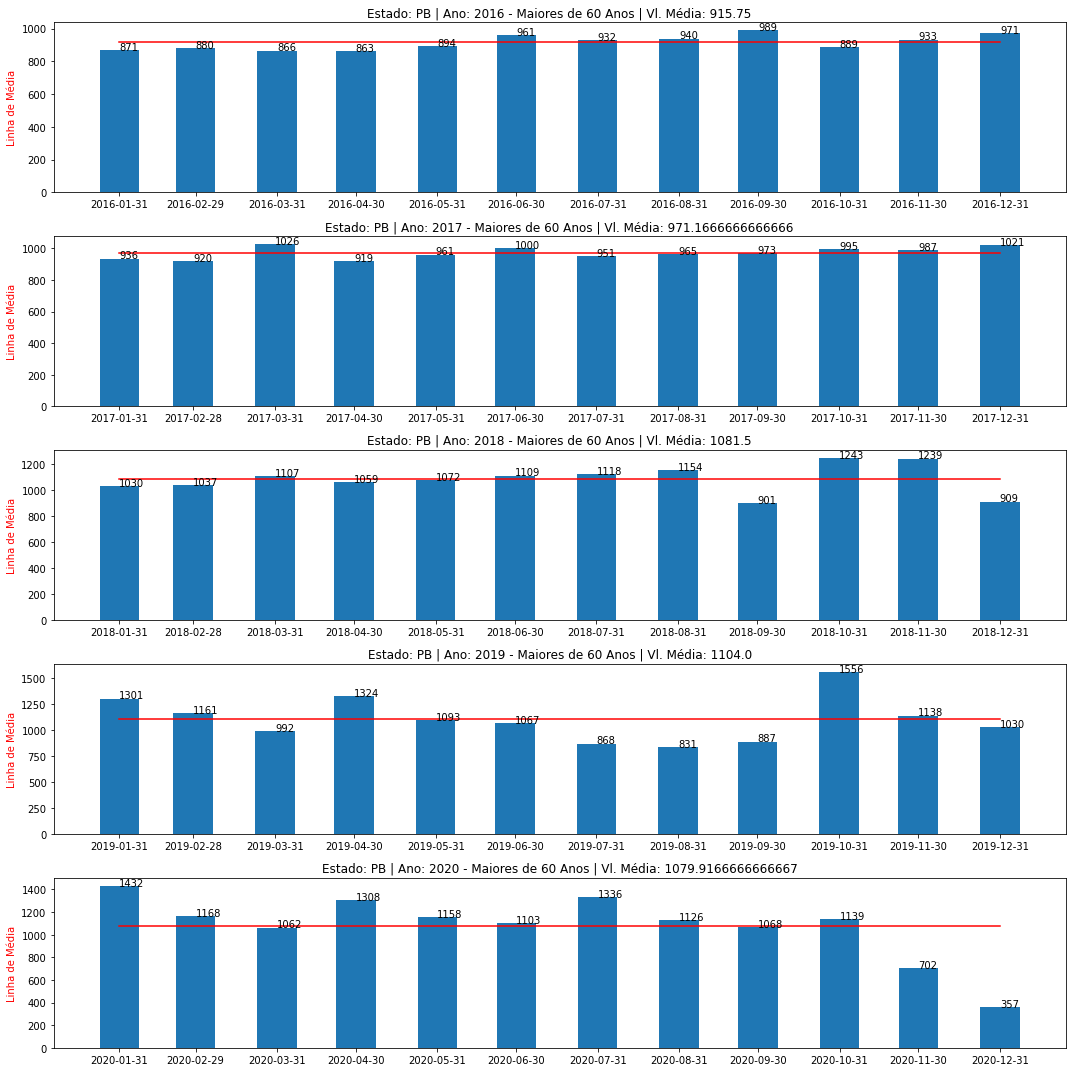

In [ ]:
graficoEstadoPorData(df_2, 'PB') 

PERNAMBUCO

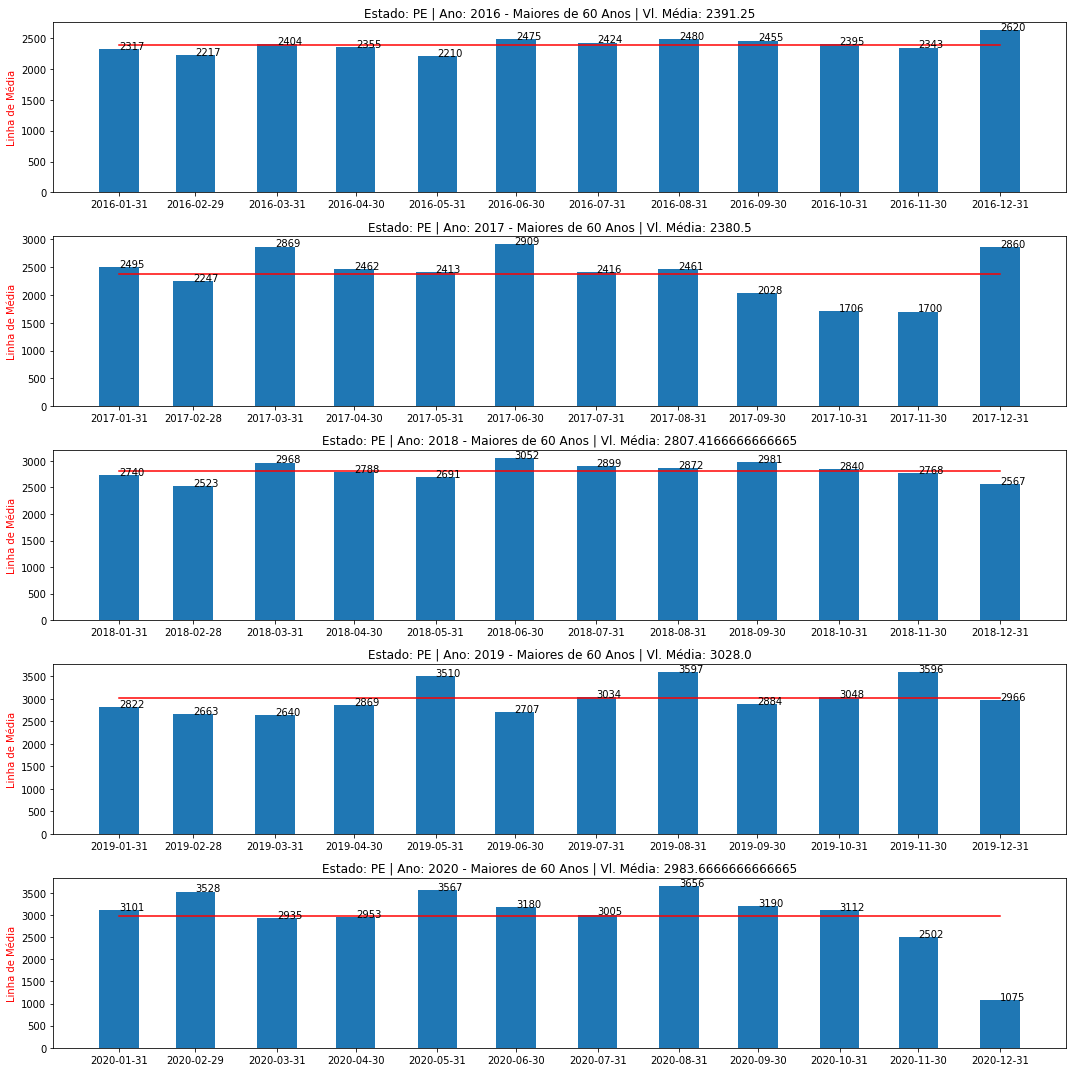

In [ ]:
graficoEstadoPorData(df_2, 'PE') 

PIAUÍ

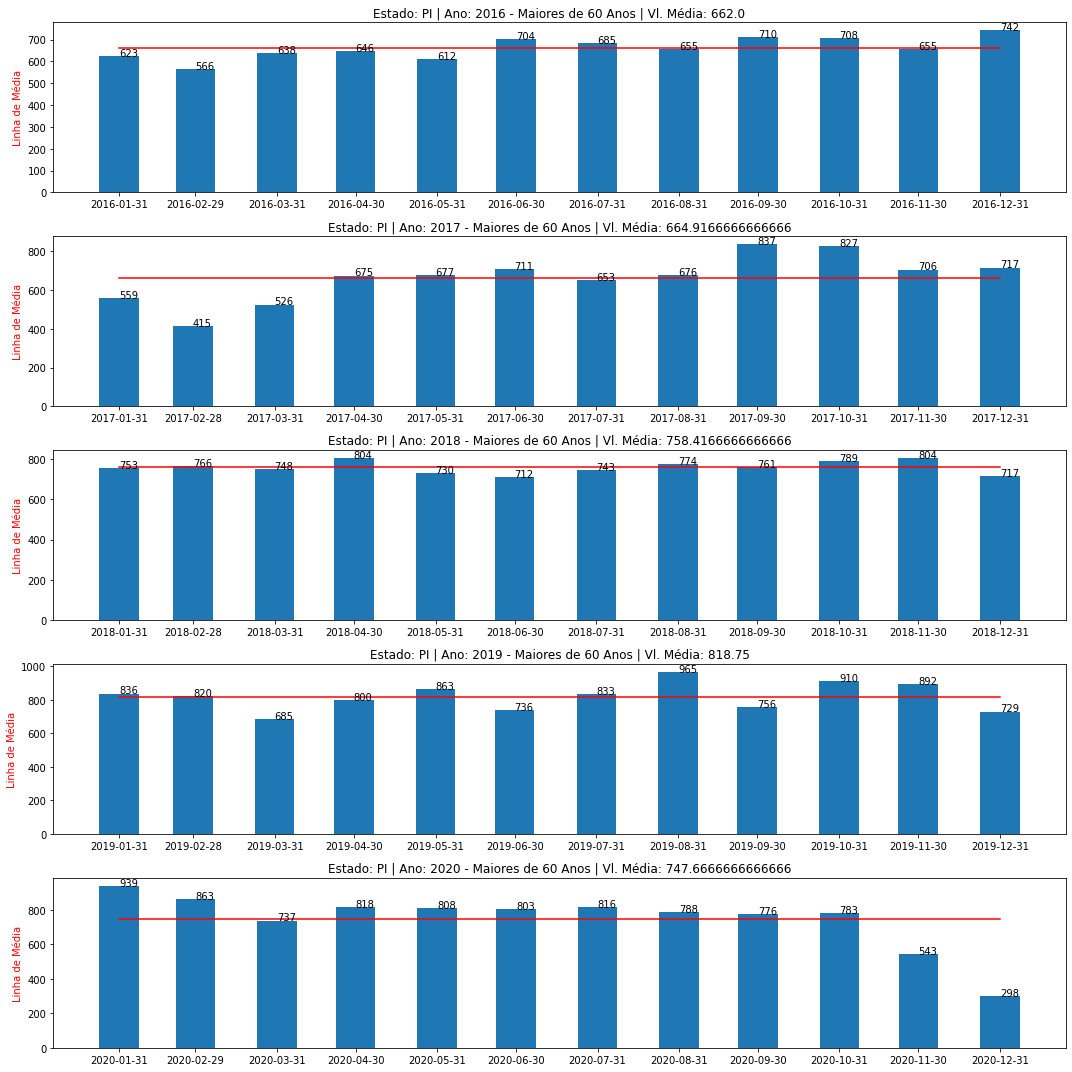

In [ ]:
graficoEstadoPorData(df_2, 'PI') 

PARANÁ

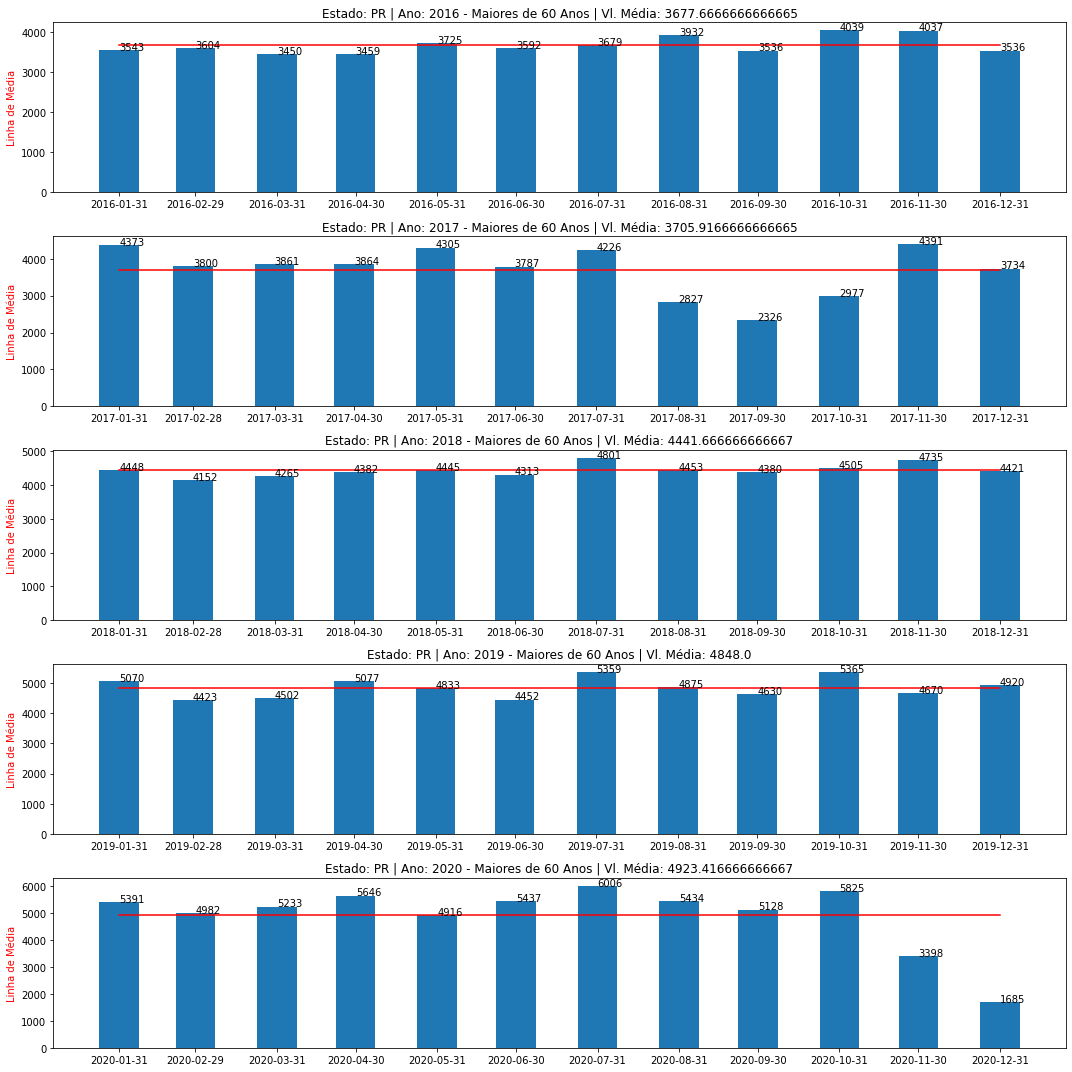

In [ ]:
graficoEstadoPorData(df_2, 'PR') 

RIO DE JANEIRO

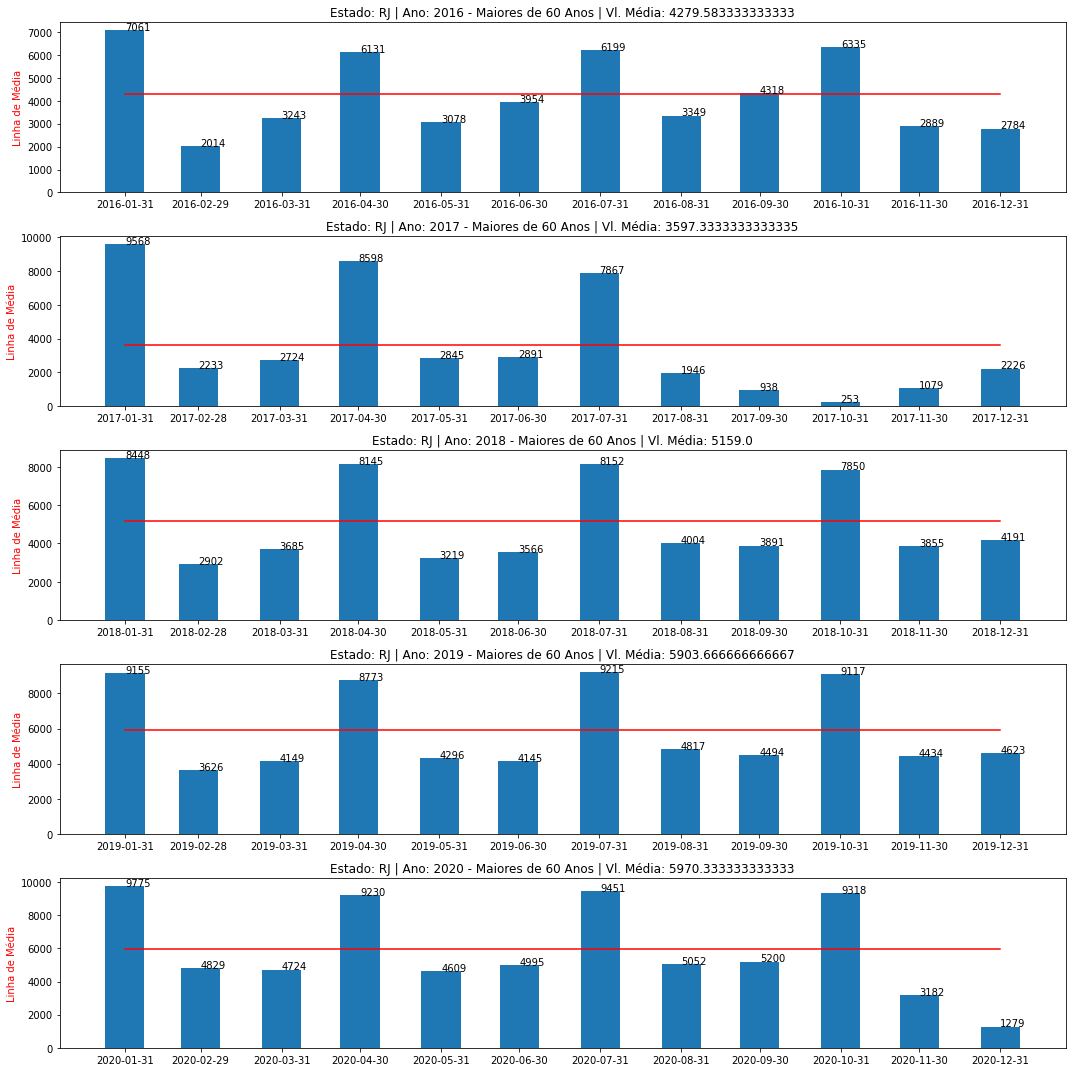

In [ ]:
graficoEstadoPorData(df_2, 'RJ') 

RIO GRANDE DO NORTE

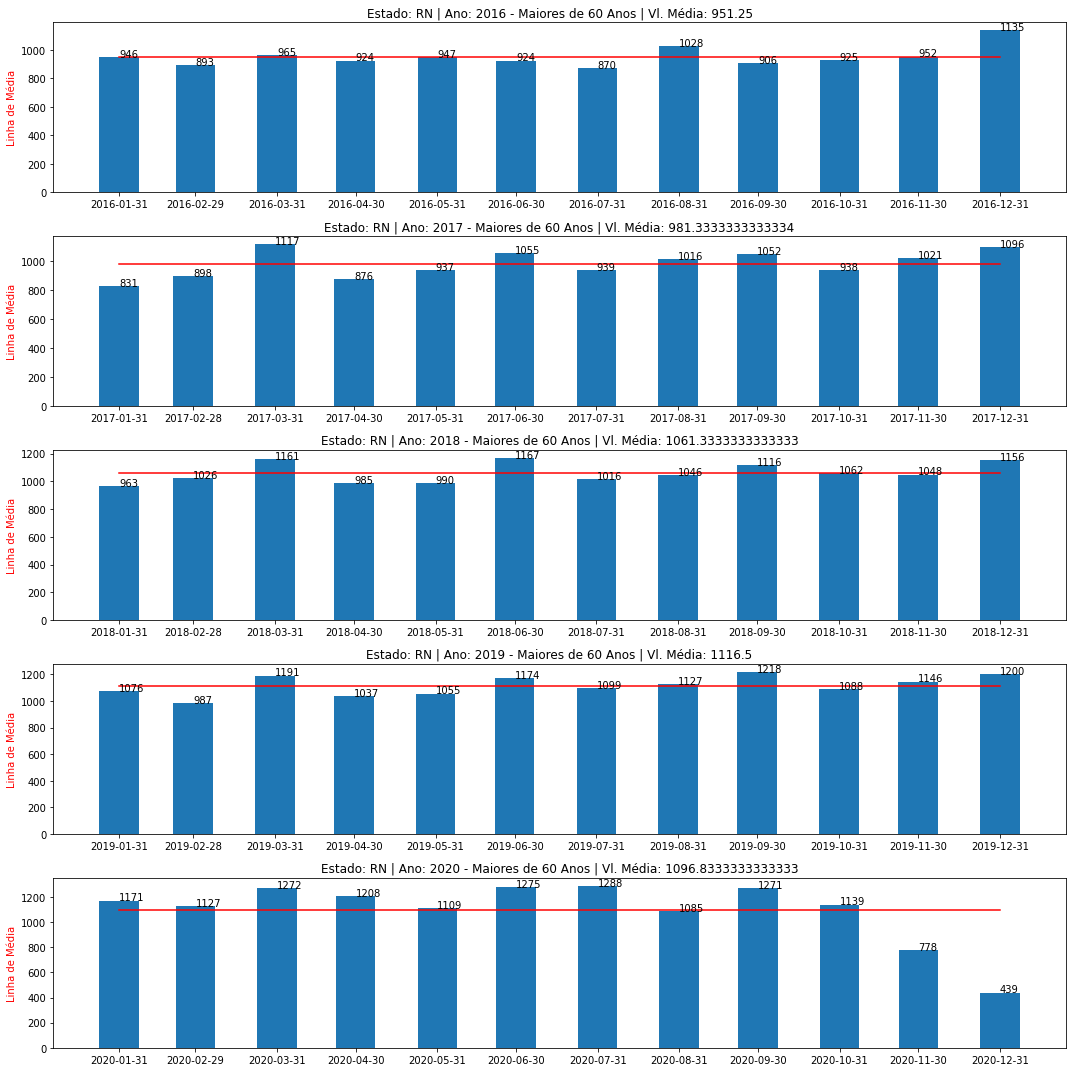

In [ ]:
graficoEstadoPorData(df_2, 'RN') 

RONDONIA

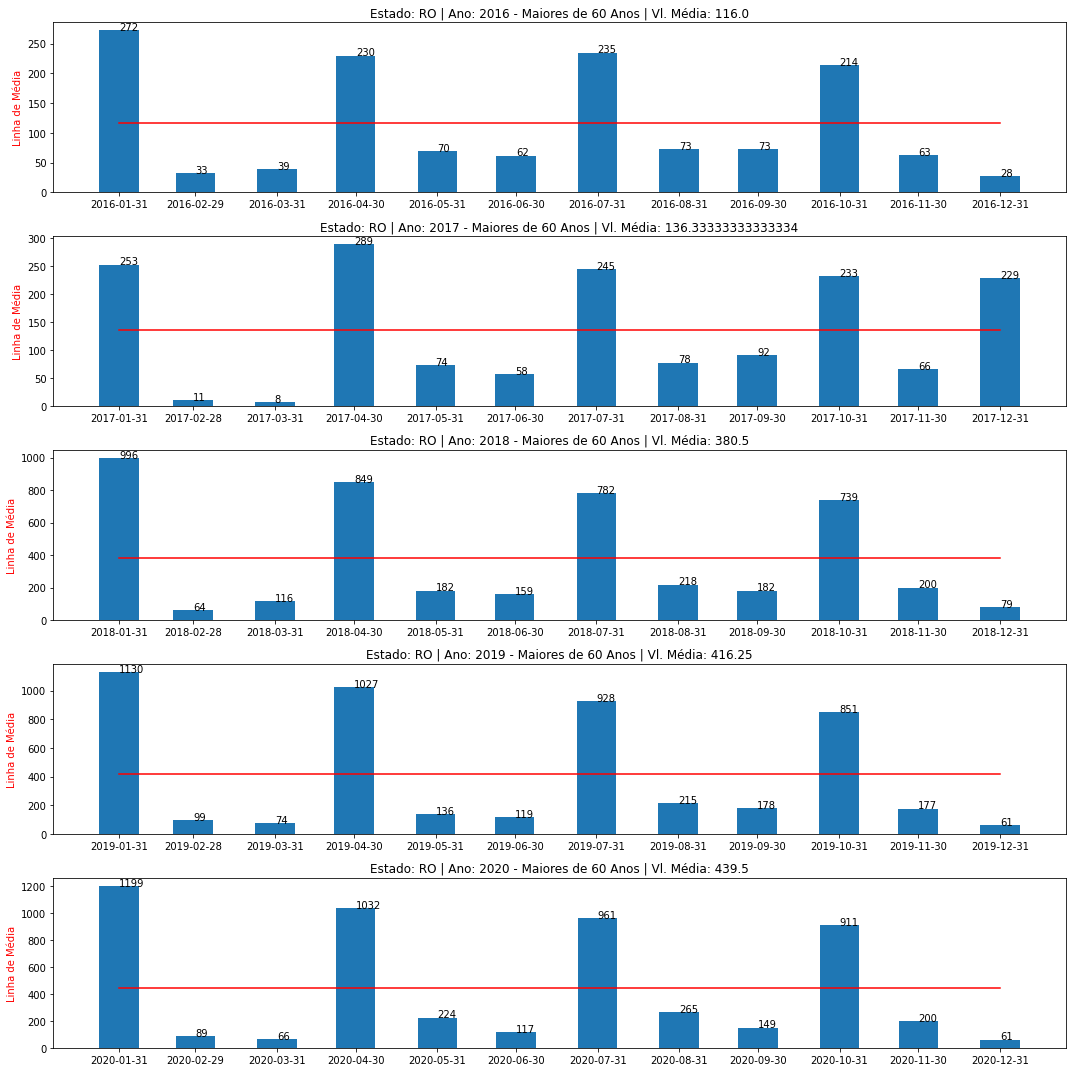

In [ ]:
graficoEstadoPorData(df_2, 'RO') 

RIO GRANDE DO SUL

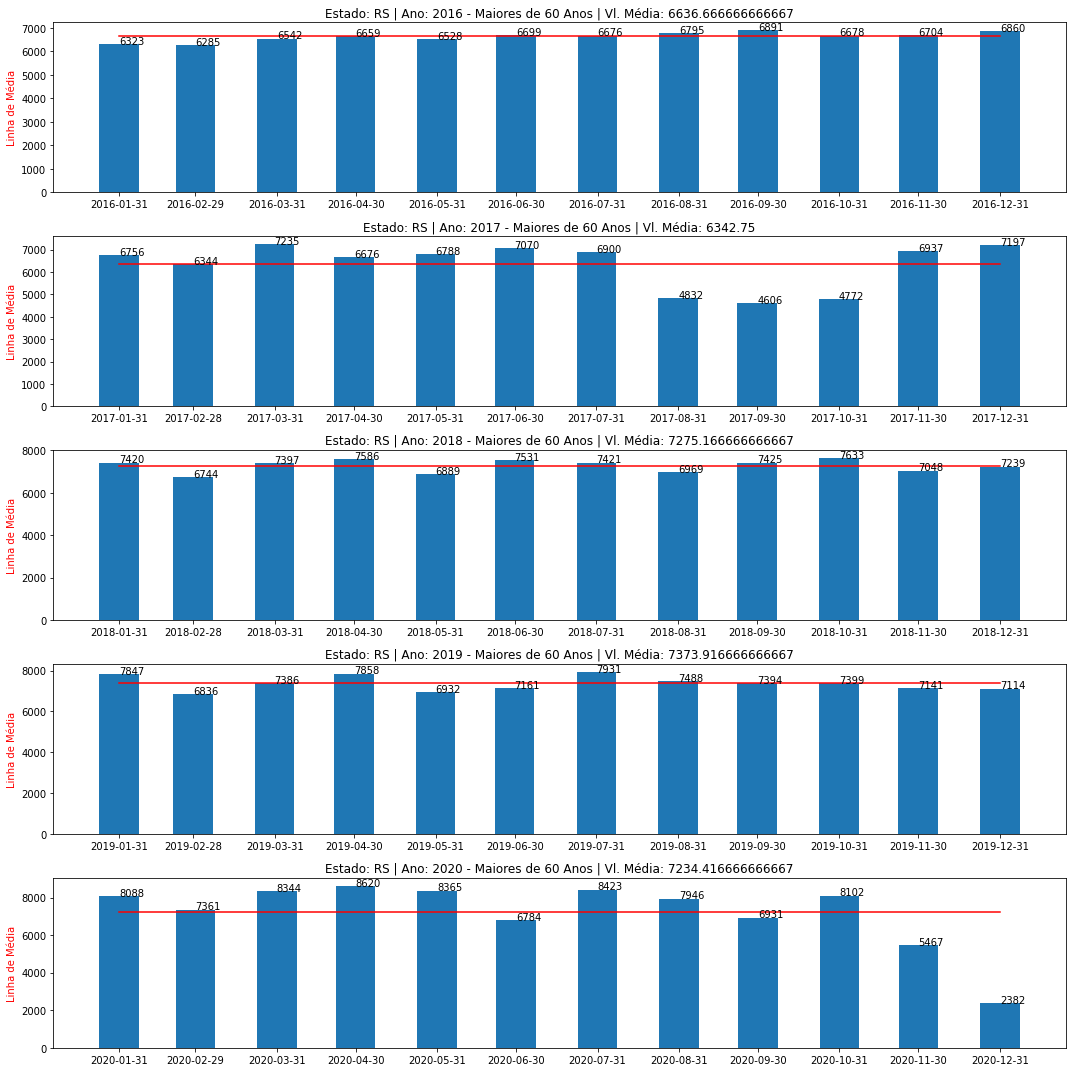

In [ ]:
graficoEstadoPorData(df_2, 'RS') 

SANTA CATARINA

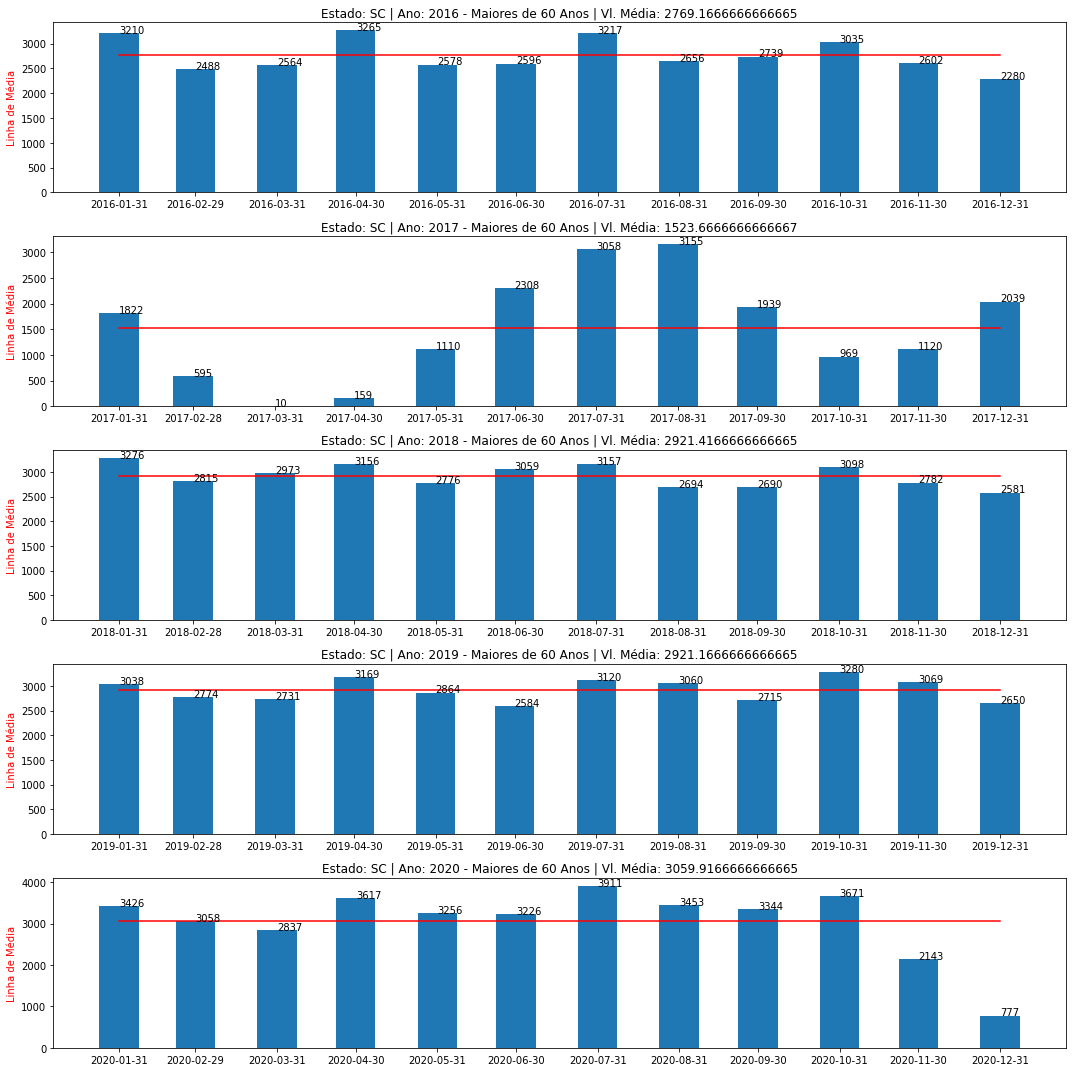

In [ ]:
graficoEstadoPorData(df_2, 'SC')	   


SERGIPE

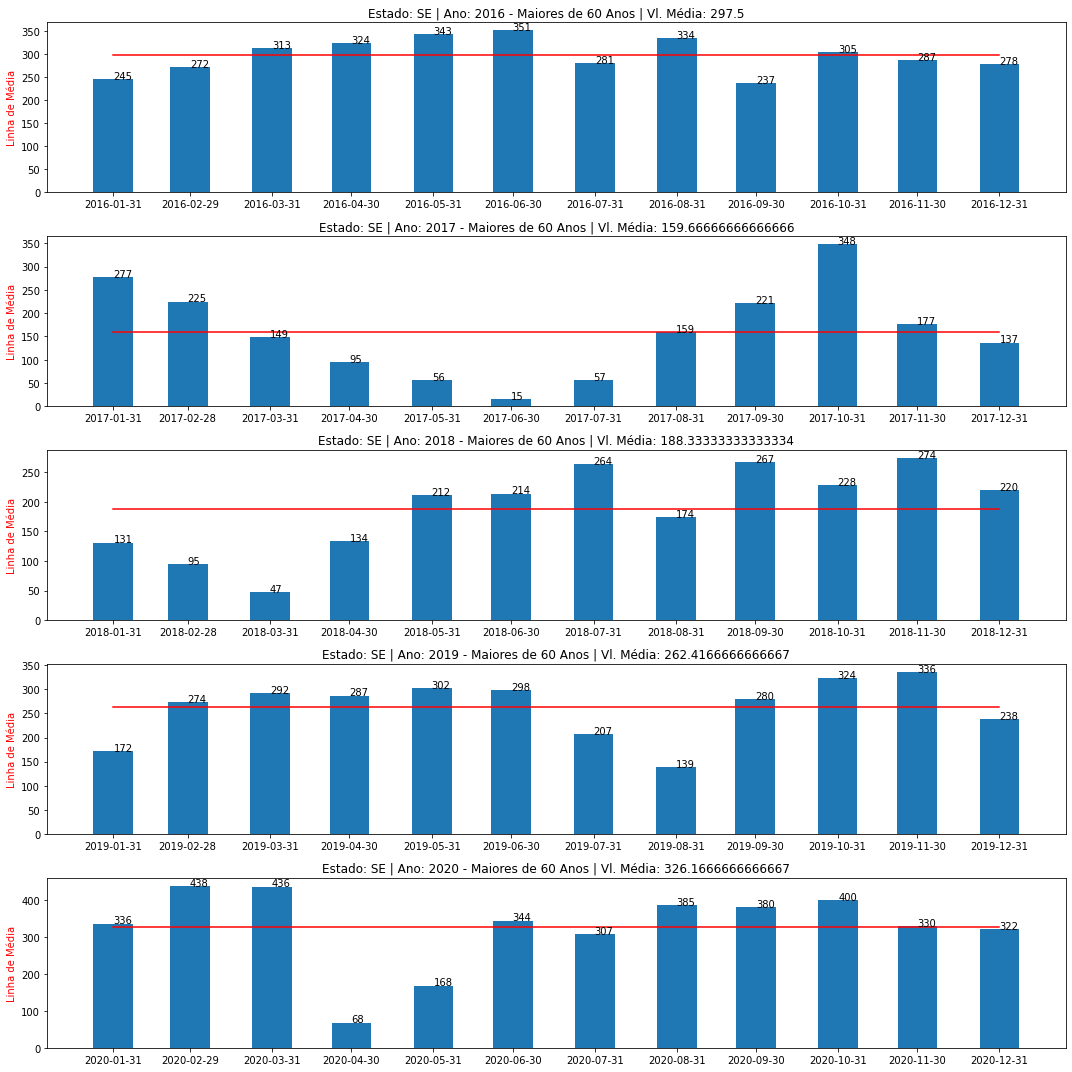

In [ ]:
graficoEstadoPorData(df_2, 'SE') 

SÃO PAULO

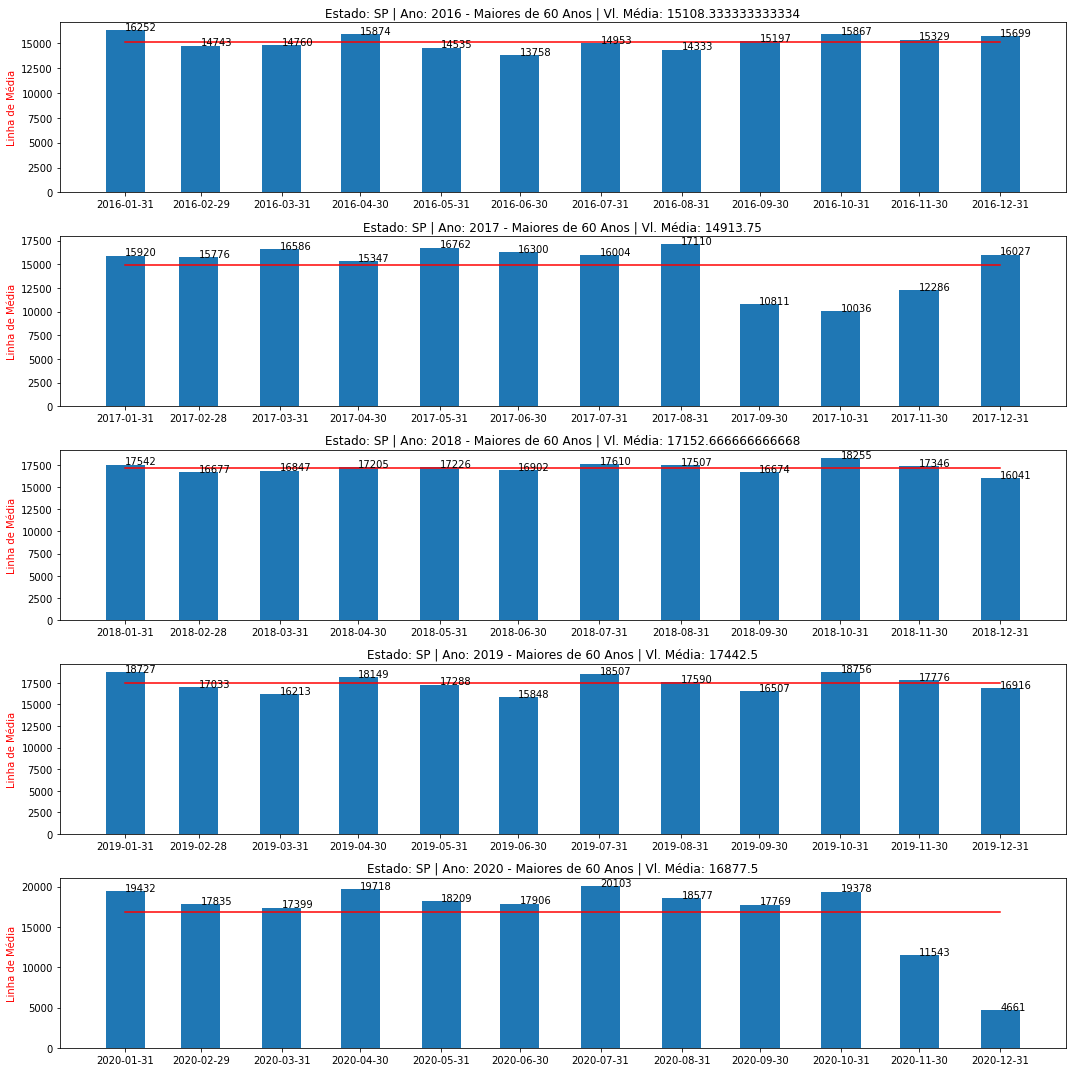

In [ ]:
graficoEstadoPorData(df_2, 'SP') 

TOCANTINS

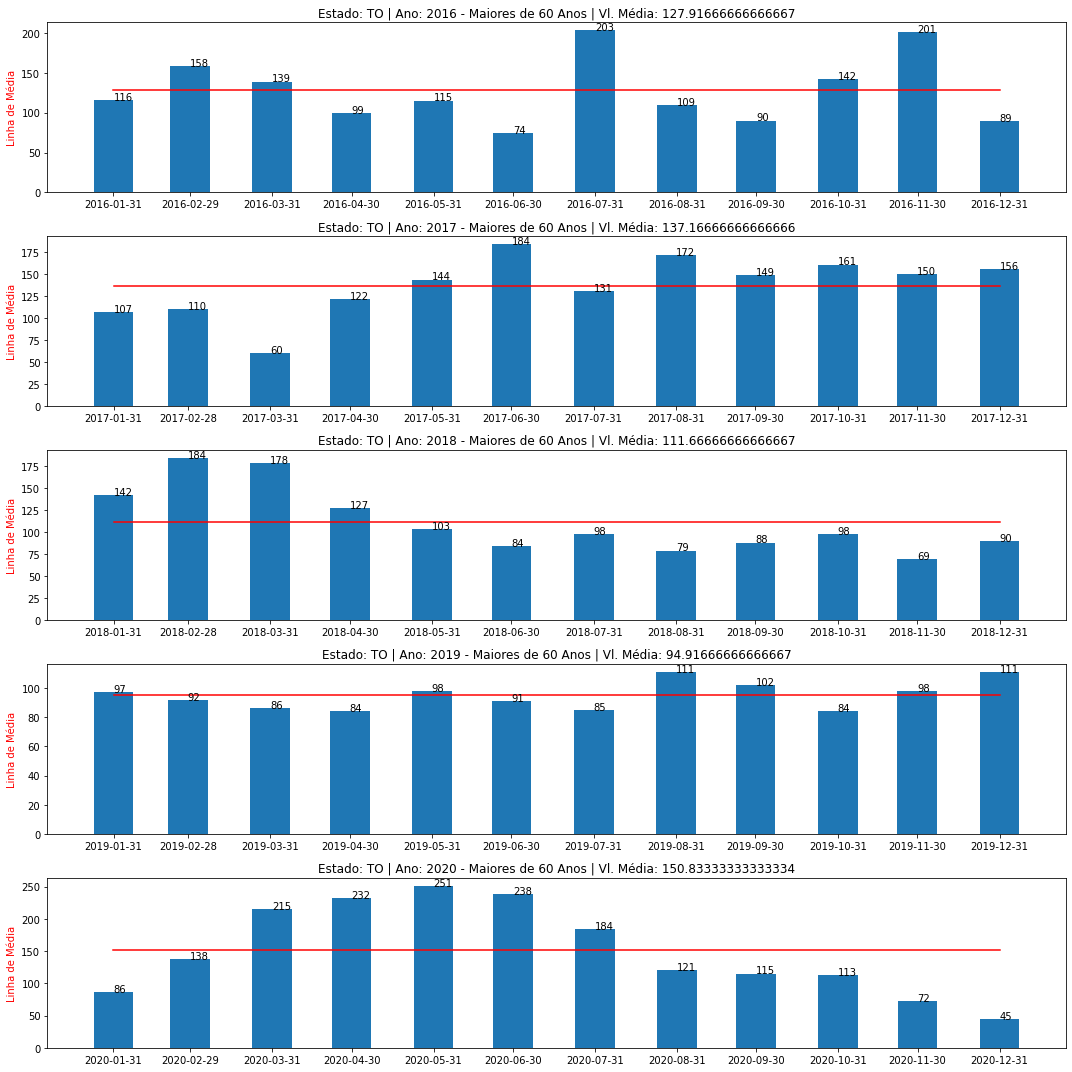

In [ ]:
graficoEstadoPorData(df_2, 'TO')

Fizemos aqui apenas uma pequena analise nos dados que temos. Não verificamos medidas de dispersão, mas podemos fazer isso.

Sentem falta de um boxplot ou de um histograma?


Ainda existe varias analises de podem ser feitas. Fizemos apenas analise de uma variaveis. Podemos analisar todos os gráficos separando por grupo de Metatastico e não metatastico, ou por outros grupos.
Vou criar um outro arquivo pra analisar por esses outros grupos